# Модуль 1. Свойства ДВПФ.

## Задача 1.1. ДВПФ и взвешивание гармонического сигнала окном


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 |
|$n_0$|  3 |  5 |  2 |  5 |  4 |  6 |


Найти аналитически ДВПФ $N$ - точечных последовательностей
$$x[k]=\sum_{m=0}^{N-1}\mathbf{1}[k-m]\;\;\;\;y[k]=x[k]\cos\left(2\pi k\dfrac{n_0}{N}\right)$$  

Построить графики последовательностей $x[k]$ и $y[k]$.
Изобразить графики модуля ДВПФ для частот $\nu \in [-0.5, \; 0.5]$
* а) используя полученные аналитические формулы;
* б) используя функцию ```np.fft.fft()```.

Сравнить полученные результаты. 

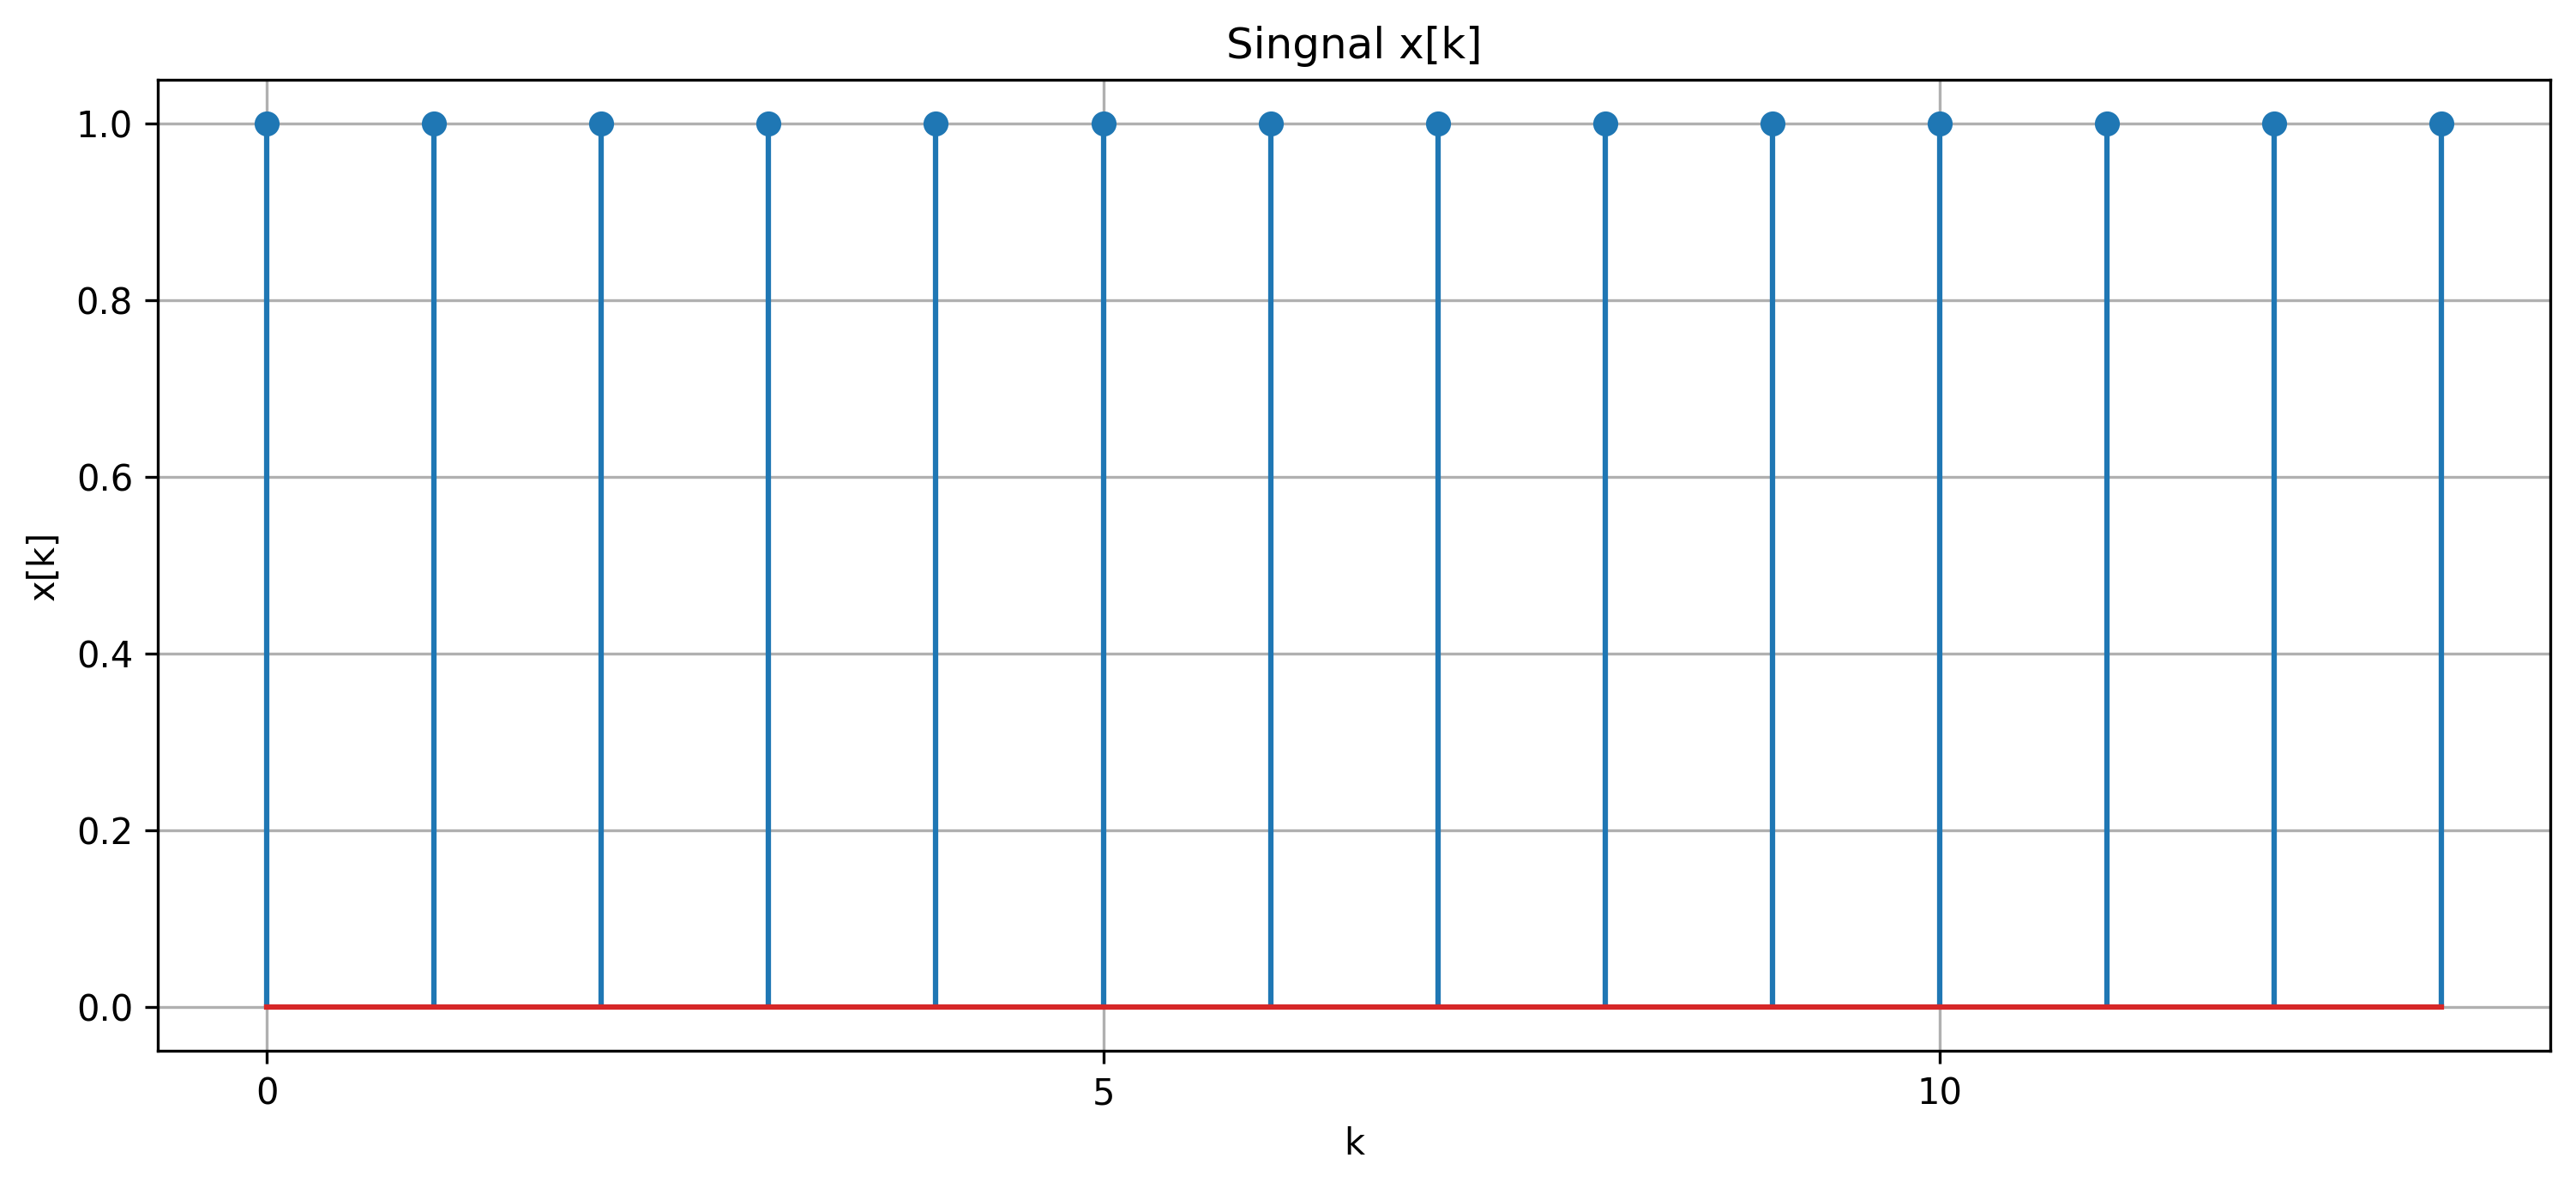

In [6]:
import numpy as np
import matplotlib.pyplot as plt

N = 14
n0 = 2

k_arr = np.arange (N)
x = np.ones (N) 


plt.figure(figsize=[12, 5], dpi=300)
plt.stem (k_arr, x, use_line_collection=True)
plt.xlabel("k")
plt.ylabel("x[k]")
plt.xticks(ticks=np.arange(0, k_arr.size, 5))
plt.title("Singnal x[k]")
plt.grid()
plt.show()
plt.close ()


In [7]:
def dftf(x, M=1024):
  return -0.5 + np.arange(M)/M, np.fft.fftshift(np.fft.fft(x, M))

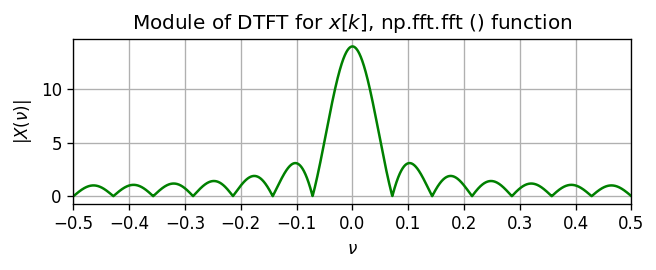

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

nu, X = dftf (x, 4096)
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(X), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|X(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Module of DTFT for $x[k]$, np.fft.fft () function")
plt.grid()

In [9]:
def x_spectrum (nu):
  global N
  if np.sin (np.pi * nu) == 0:
    return N
  return np.exp (-1j * np.pi * nu * (N - 1)) * np.sin (np.pi * nu * N) / np.sin (np.pi * nu)

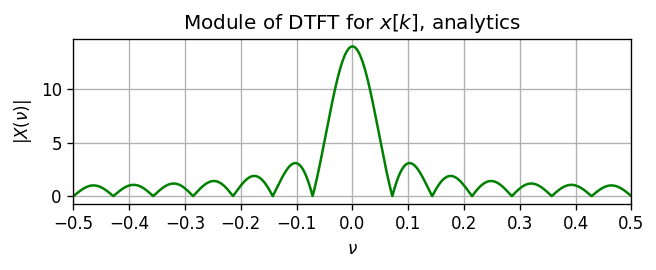

In [10]:
X_anal = np.array ([x_spectrum (nu_value) for nu_value in nu])
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(X_anal), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|X(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Module of DTFT for $x[k]$, analytics")
plt.grid()

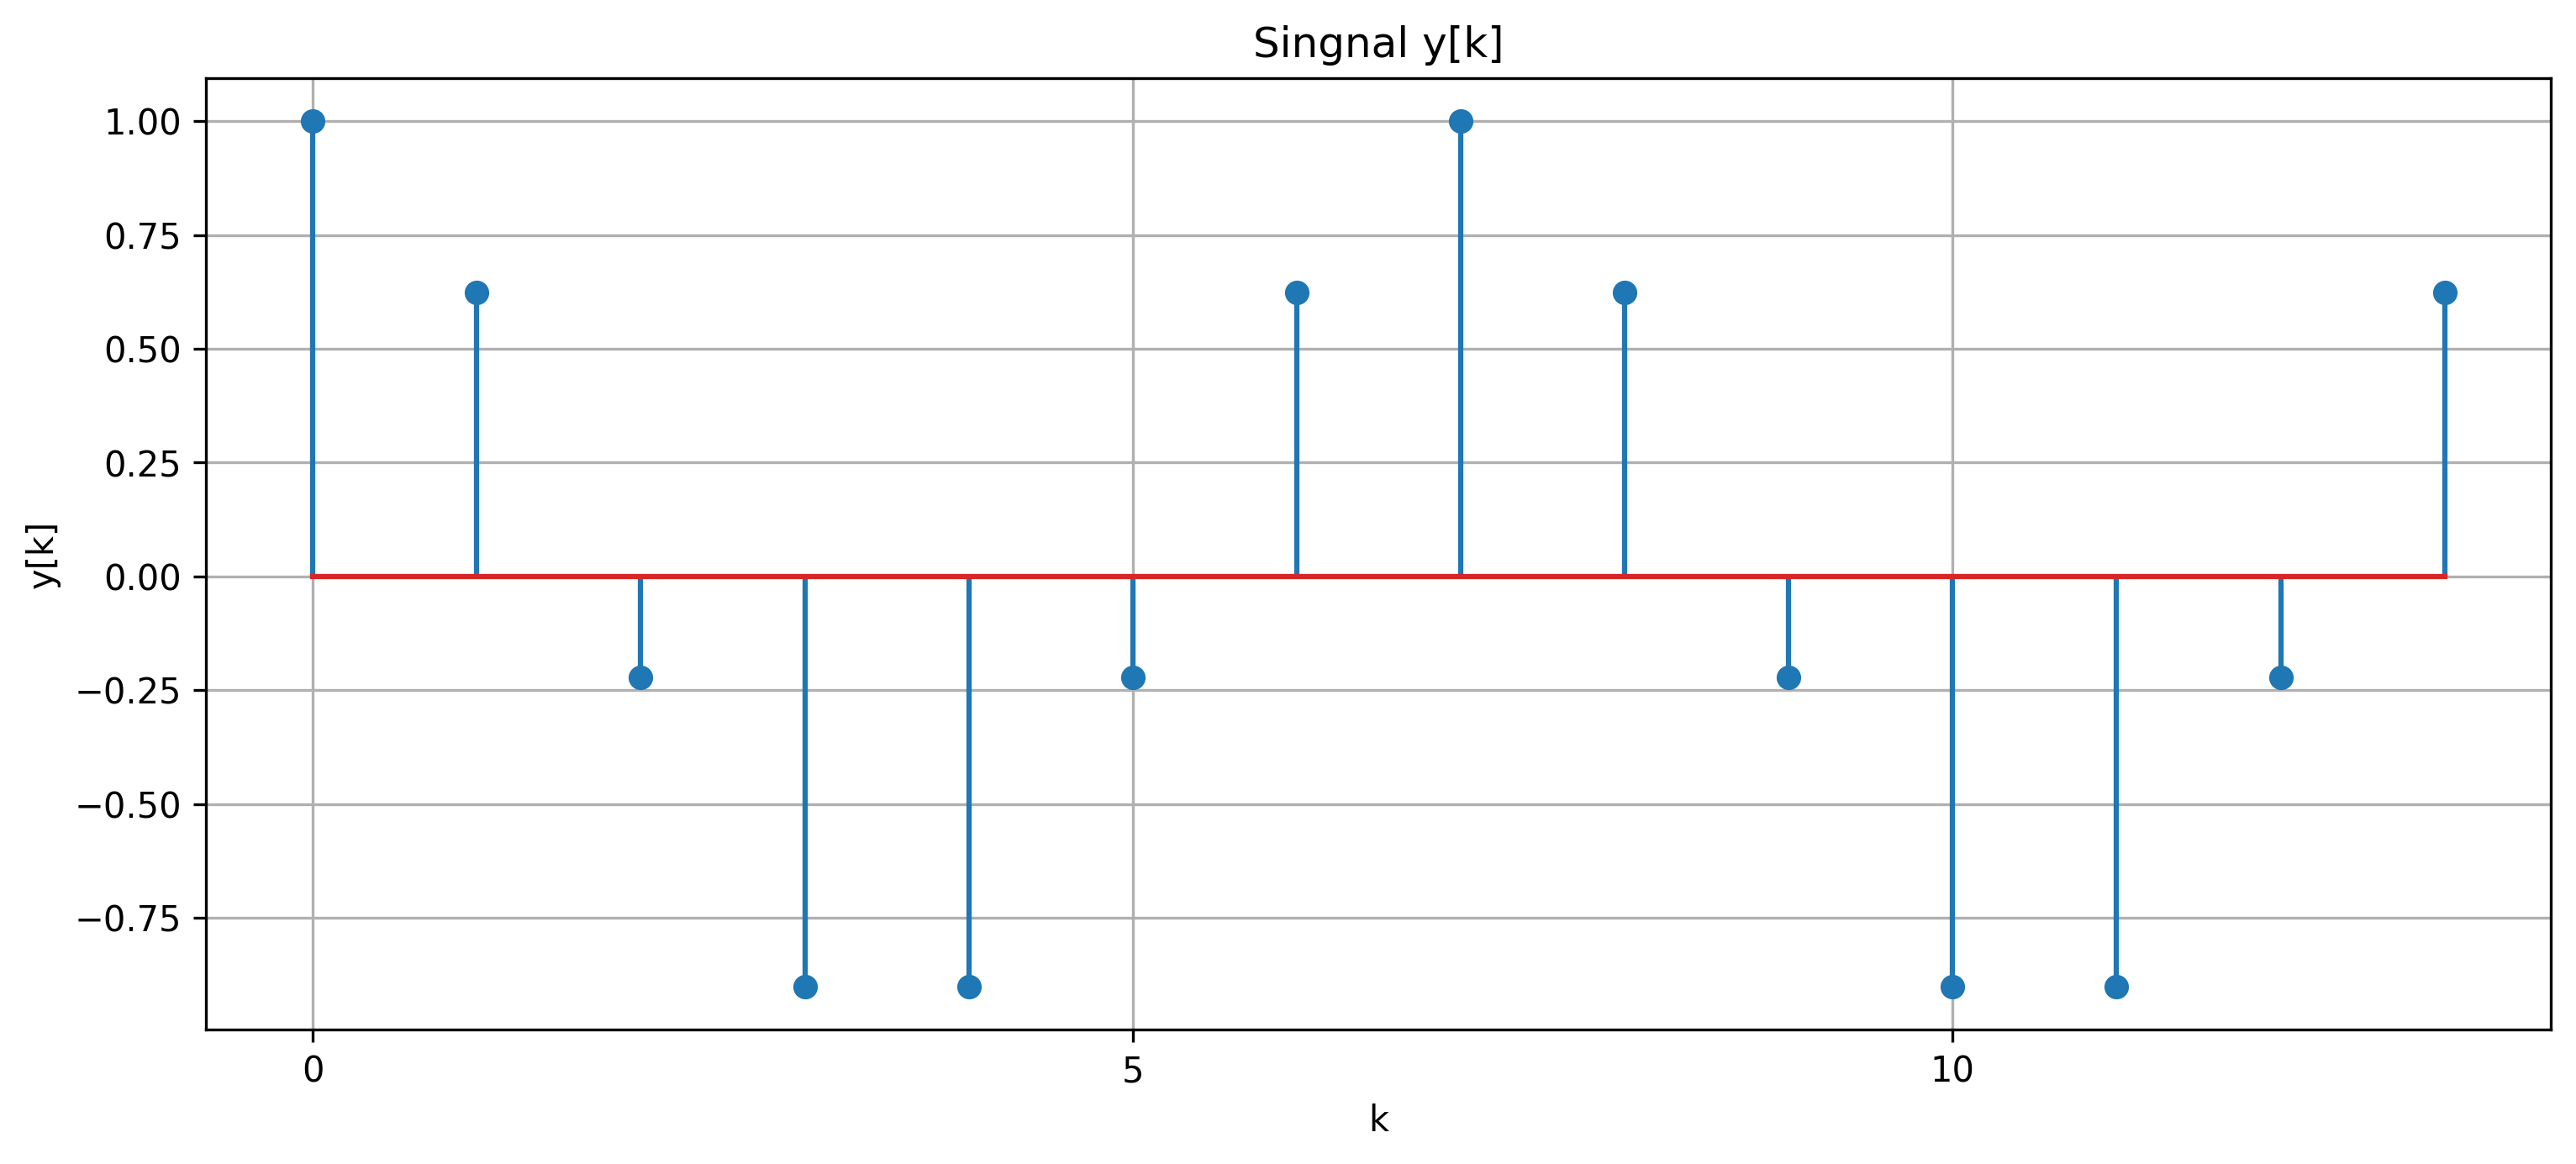

In [11]:
k_arr = np.arange (N)
y = np.array ([np.cos (2 * np.pi * k * n0 / N) for k in range (N)]) 



plt.figure(figsize=[12, 5], dpi=300)
plt.stem (k_arr, y, use_line_collection=True)
plt.xlabel("k")
plt.ylabel("y[k]")
plt.xticks(ticks=np.arange(0, k_arr.size, 5))
plt.title("Singnal y[k]")
plt.grid()
plt.show()
plt.close ()


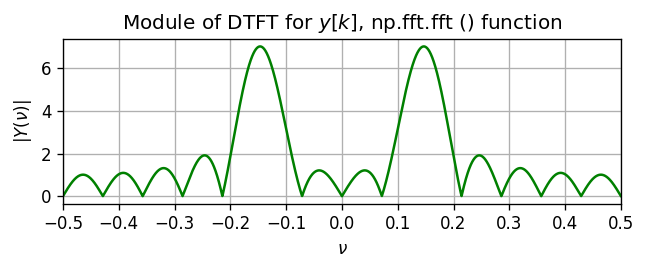

In [12]:


nu, Y = dftf (y, 4096)
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(Y), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|Y(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Module of DTFT for $y[k]$, np.fft.fft () function")
plt.grid()

In [13]:
def y_spectrum (nu):
  global n0, N
  return 0.5 * (x_spectrum (nu - n0 / N) + x_spectrum (nu + n0 / N))

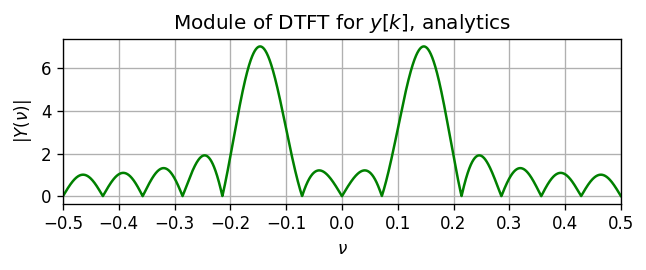

In [14]:
Y_anal = np.array ([y_spectrum (nu_value) for nu_value in nu])
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs (Y_anal), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|Y(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Module of DTFT for $y[k]$, analytics")
plt.grid()

## Задача 1.2. Симметрия ДВПФ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 |


Создайте произвольную действительную последовательность отсчетов $x[k]$ длиной $N$ отсчетов. Постройте с помощью моделирвоания графики следующих функций  для частот $\nu \in [-0.5, \; 0.5]$:
* модуль ДВПФ $|X(\nu)|$,
* фазовая часть ДВПФ $\varphi(\nu)=\angle X(\nu)$,
* действительная часть ДВПФ $\text{Re } X(\nu)$,
* мнимая  часть ДВПФ $\text{Im } X(\nu)$.

Определите, являются ли они симметричными либо антисимметричными относительно нулевой частоты.

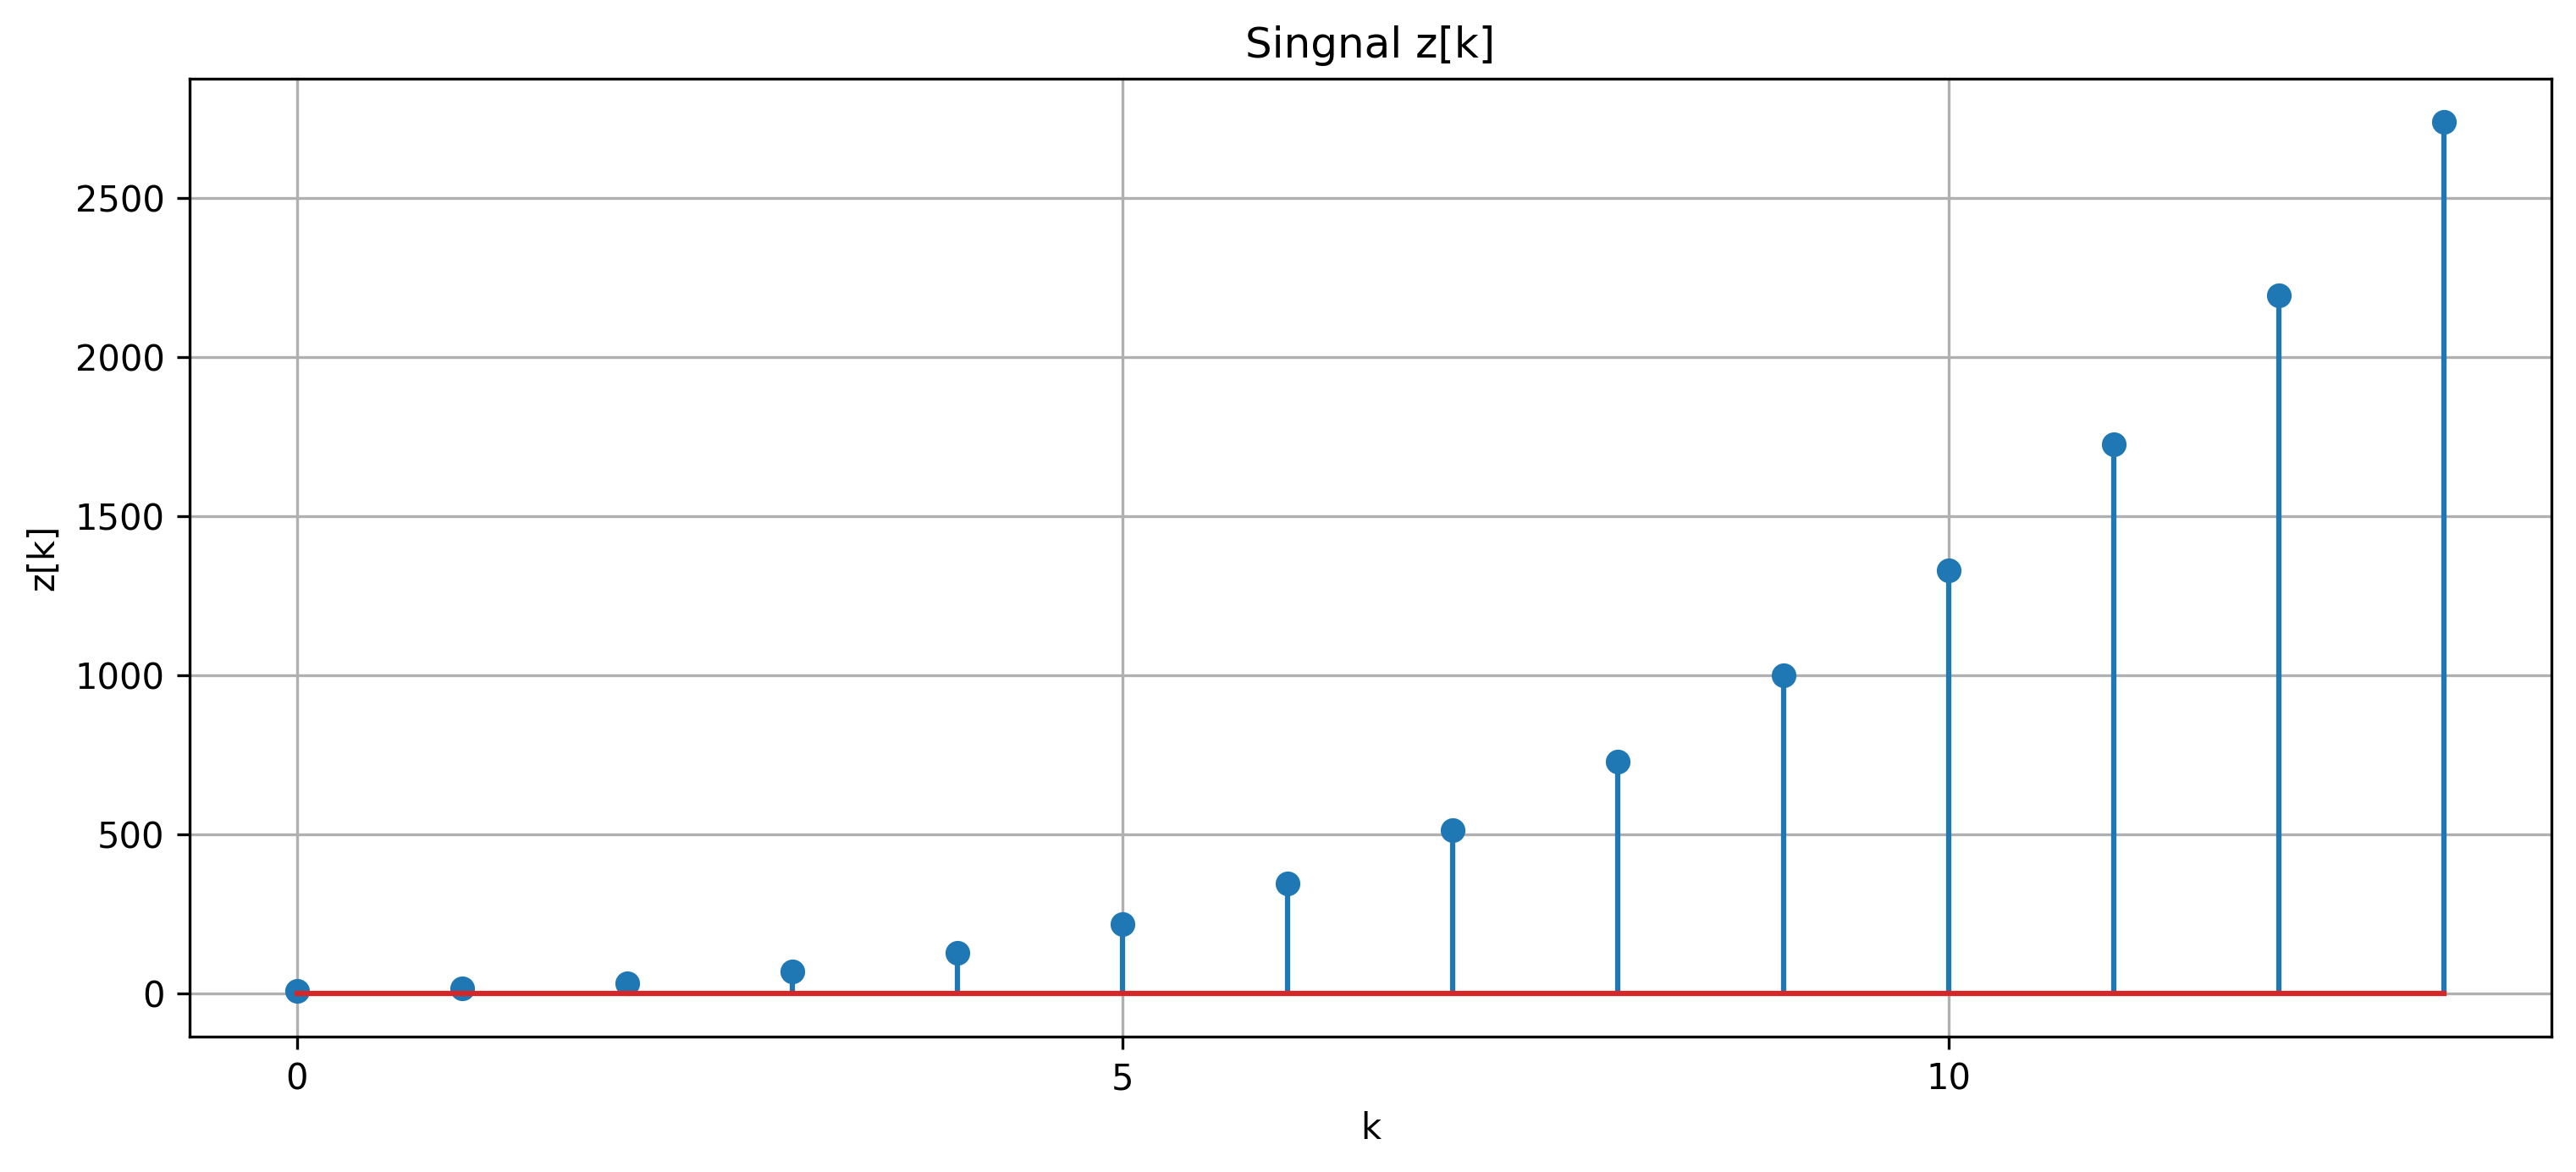

In [15]:


N = 14
n0 = 2

k_arr = np.arange (N)
z = np.array ([(8 + 2 * k + 3 * k * k +  k * k * k) for k in range (N)]) 


plt.figure(figsize=[12, 5], dpi=300)
plt.stem (k_arr, z, use_line_collection=True)
plt.xlabel("k")
plt.ylabel("z[k]")
plt.xticks(ticks=np.arange(0, k_arr.size, 5))
plt.title("Singnal z[k]")
plt.grid()
plt.show()
plt.close ()


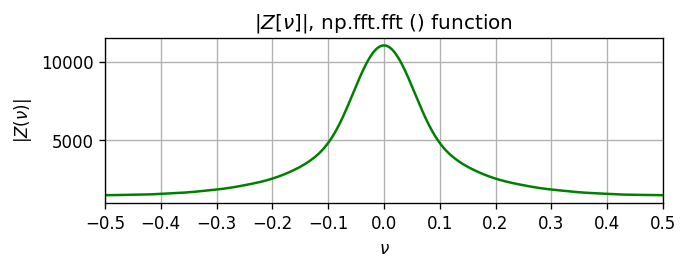

In [16]:
nu, Z = dftf (z, 4096)
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(Z), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|Z(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("|$Z[\\nu]$|, np.fft.fft () function")
plt.grid()

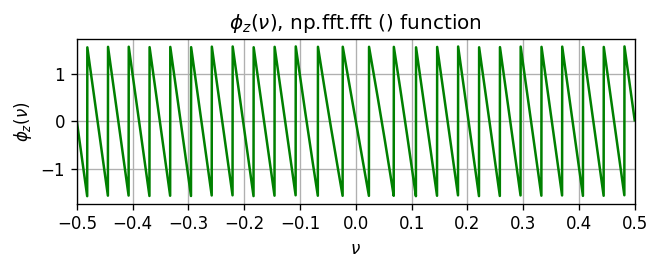

In [17]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, np.arctan (Z.imag / Z.real), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$\\phi_z (\\nu)$")
plt.xlim([-0.5, 0.5])
plt.title("$\\phi_z (\\nu)$, np.fft.fft () function")
plt.grid()

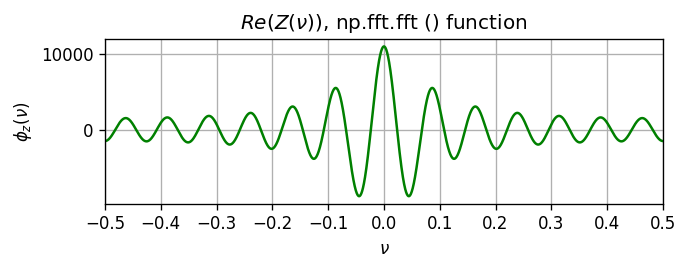

In [18]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, Z.real, 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$\\phi_z (\\nu)$")
plt.xlim([-0.5, 0.5])
plt.title("$Re(Z(\\nu))$, np.fft.fft () function")
plt.grid()

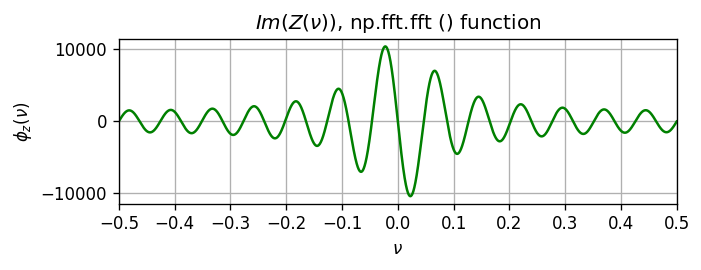

In [19]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, Z.imag, 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$\\phi_z (\\nu)$")
plt.xlim([-0.5, 0.5])
plt.title("$Im(Z(\\nu))$, np.fft.fft () function")
plt.grid()

# Модуль 2. Свойства ДПФ.




## Задача 2.1. Циклический сдвиг ДПФ

| Варианты: |  $x[k]$  | $n_0$ |  $l$  |
|:-----------:|:---:|:---:|:---:|
|**1**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;2.0\;\;3.3\}$$|  -3  |  6  |
|**2**|$$\{\underbrace{3.8}_{k=0}\;\;8.3\;\;0.1\;\;9.1\;\;1.5\;\;10.0\;\;5.1\;\;1.9\}$$|  4  |  8 |
|**3**|$$\{\underbrace{2.8}_{k=0}\;\;0\;\;4.6\;\;0\;\;0.9\;\;0\;\;9.0\;\;0\;\;6.4\;\;0\;\;8.2\;\;0\}$$|  3  |  12  |
|**4**|$$\{\underbrace{2.8}_{k=0} \;\;4.6\;\;0.9\;\;3.8\;\;5.0\;\;1.7\}$$|  3  |  6  |
|**5**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;3.0\;\;2.3\;\;5.3\;\;2.1\}$$| -4  |  8  |
|**6**|$$\{\underbrace{3.8}_{k=0}\;\;0\;\;8.3\;\;0\;\;9.1\;\;0\;\;1.9\;\;0\}$$|  -2  |  8  |

 Пусть $x[k]\overset{\text{ДПФ}}\longleftrightarrow X[n]$,  $y[k] \overset{\text{ДПФ}}\longleftrightarrow  Y[n]$, $Y[n]=X[(n+n_0) \mod l],$


1) Вычислите аналитически последовательность $y[k]$ без непосредственного вычисления ДПФ $x[k]$, используя свойства ДПФ.

2) Проведедите моделирование в Python. 
- Вычислите ДПФ $X[n]$ последовательности $x[k]$ (```fft(x)```).
- Осуществите циклический сдвиг $X[n]$ (```np.roll(X, n0)```).
- Вычислите обратное ДПФ для $Y[n]$ (```ifft(Y)```).

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


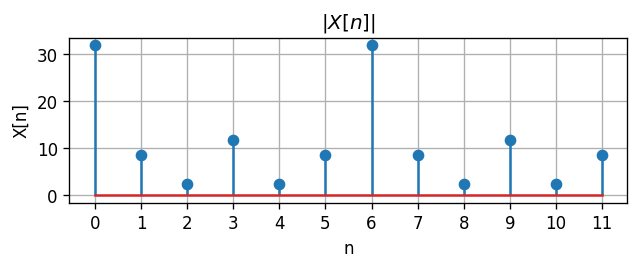

In [20]:
n0 = 3
l = 12

x_array = [2.8, 0, 4.6, 0, 0.9, 0, 9.0, 0, 6.4, 0, 8.2, 0]
n_array = [n for n in range (l)]
print (n_array)
X_array = np.fft.fft (x_array, l)

plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.stem (n_array, abs (X_array), use_line_collection=True)
plt.xlabel("n")
plt.ylabel("X[n]")
plt.title("$|X[n]|$")
ax1.set_xticks(n_array)
plt.grid()
plt.show()
plt.close ()


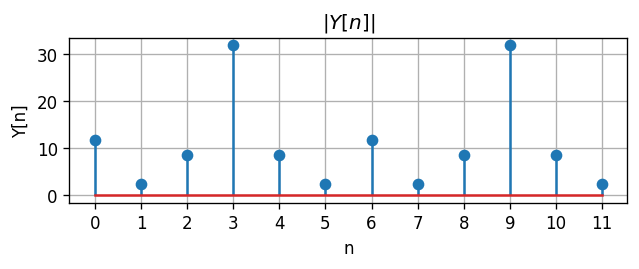

In [21]:
Y_array = np.roll (X_array, n0)

plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.stem (n_array, abs (Y_array), use_line_collection=True)
plt.xlabel("n")
plt.ylabel("Y[n]")
plt.title("$|Y[n]|$")
ax1.set_xticks(n_array)
plt.grid()
plt.show()
plt.close ()


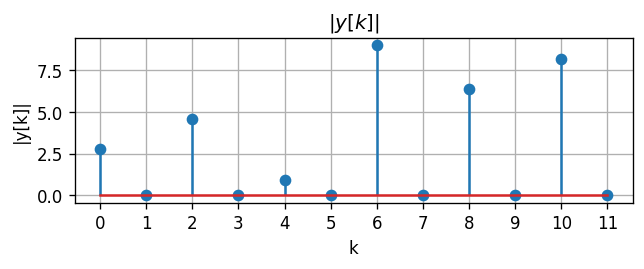

In [22]:
y_array = np.fft.ifft (Y_array, l)


plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.stem (n_array, abs (y_array), use_line_collection=True)
plt.xlabel("k")
plt.ylabel("|y[k]|")
plt.title("$|y[k]|$")
ax1.set_xticks(n_array)
plt.grid()
plt.show()
plt.close ()

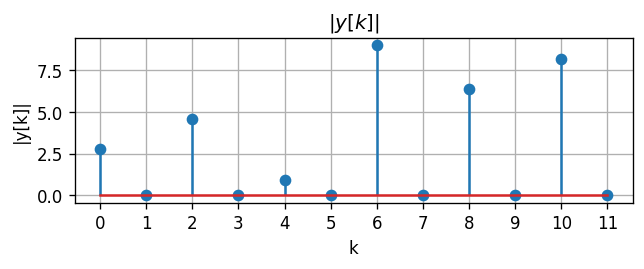

In [23]:
y_array_anal = np.array (x_array) * np.exp (- np.pi * 1j * np. array (n_array) / 2)

plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.stem (n_array, abs (y_array_anal), use_line_collection=True)
plt.xlabel("k")
plt.ylabel("|y[k]|")
plt.title("$|y[k]|$")
ax1.set_xticks(n_array)
plt.grid()
plt.show()
plt.close ()

## Задача 2.2. Циклический сдвиг последовательности.

| Варианты: |  $X[n]$  | $k_0$ |  $l$  |
|:-----------:|:---:|:---:|:---:|
|**1**|$$\{ (2.8+0.0j) \;\; (4.6\sqrt3-4.6j) \;\; (-4.6\sqrt3-4.6j) \;\; (0.9+0.0j) \;\;(1.9\sqrt3-1.9j) \;\;(-3.8\sqrt3+3.8j) \}$$|  2  |  6  |
|**2**|$$\{ (1+\sqrt3j) \;\; (-2.1\sqrt3+2.1j) \;\; (-2.4\sqrt3-2.4j) \;\; (0.5-0.5j) \;\; (3.1+3.1\sqrt3j) \;\; (-1.1+1.1\sqrt3j) \}$$|  -4  |  6 |
|**3**|$$\{ (\sqrt2+\sqrt2j) \;\; (-\sqrt3+2.5j) \;\; (-2.4-\sqrt5j) \;\; (0.5\sqrt3-0.5\sqrt2j) \;\; (\sqrt5+3.1\sqrt2j) \;\; (-1.1+1.1j) \}$$|  -3  |  6  |
|**4**|$$\{ (-1.1-1.1\sqrt3j) \,\,\,\, (-\sqrt3+1j) \,\,\,\, (-0.6\sqrt3-0.6j) \,\,\,\, (3.4-0j) \,\,\,\,(-1.2\sqrt3+1.2j) \,\,\,\,(2.0\sqrt3+2.0j) \}$$|  5  |  6  |
|**5**|$$\{ (\sqrt2+\sqrt2j) \;\; (-\sqrt3+2.5j) \;\; (-2.4-\sqrt5j) \;\; (\dfrac{\sqrt3}{2}-\dfrac{\sqrt2}{2}j) \;\; (\sqrt5+3.1\sqrt2j) \;\; (-1.1-1.1j) \;\; (\dfrac{\sqrt2}{2}-\dfrac{\sqrt3}{2}j) \;\; (\sqrt3-2.5j)\}$$|  4  |  8  |
|**6**|$$\{ (2\pi-3\mathrm{e}j) \;\;  (-2.4+1.2j) \;\;  (-4.8-2.4\sqrt3j) \;\;  (0.8-3.2j)\;\; (-\mathrm{e}^\pi+\pi^\mathrm{e}j)  \;\;  (3.2+3.0j) \;\; (0-1j) \;\; (\sqrt2+\sqrt3j)\}$$|  -2  |  8  |

 Пусть $x[k]\overset{\text{ДПФ}}\longleftrightarrow X[n]$,  $y[k] \overset{\text{ДПФ}}\longleftrightarrow  Y[n]$, $y[k]=x[(k+k_0) \mod l].$

1) Вычислите аналитически $Y[n]$, используя свойства ДПФ.

2) Проведедите моделирование в Python. 
- Вычислите обратное ДПФ последовательности  ДПФ отсчетов $X[n]$ (```ifft(X)```).
- Осуществите циклический сдвиг $x[k]$ (```np.roll(x, n0)```).
- Вычислите ДПФ для $y[k]$ (```fft(Y)```).

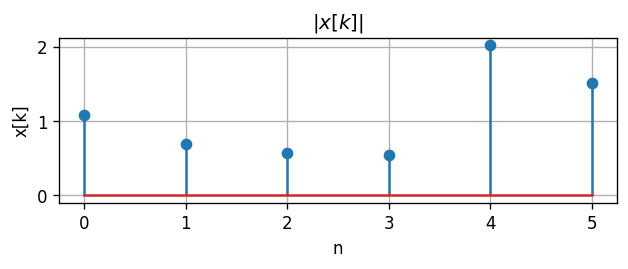

In [24]:
k0 = -3
l = 6

X_array = [np.sqrt (2) + 1j * np.sqrt (2), -np.sqrt (3) + 1j * 2.5, -2.4 - 1j * np.sqrt (5), 0.5 * np.sqrt (3) - 0.5 * np.sqrt (2) * 1j,
           np.sqrt (5) + 3.1 * np.sqrt (2) * 1j, -1.1 + 1.1 * 1j]
n_array = [n for n in range (l)]
x_array = np.fft.ifft (X_array, l)

plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.stem (n_array, abs (x_array), use_line_collection=True)
plt.xlabel("n")
plt.ylabel("x[k]")
plt.title("$|x[k]|$")
ax1.set_xticks(n_array)
plt.grid()
plt.show()
plt.close ()


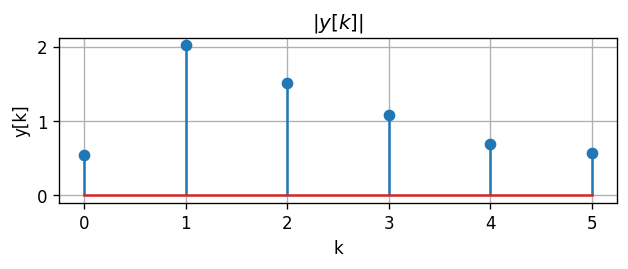

In [25]:
y_array = np.roll (x_array, k0)

plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.stem (n_array, abs (y_array), use_line_collection=True)
plt.xlabel("k")
plt.ylabel("y[k]")
plt.title("$|y[k]|$")
ax1.set_xticks(n_array)
plt.grid()
plt.show()
plt.close ()

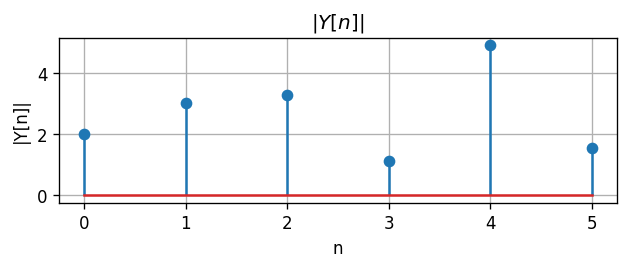

In [26]:
Y_array = np.fft.fft (y_array, l)


plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.stem (n_array, abs (Y_array), use_line_collection=True)
plt.xlabel("n")
plt.ylabel("|Y[n]|")
plt.title("$|Y[n]|$")
ax1.set_xticks(n_array)
plt.grid()
plt.show()
plt.close ()

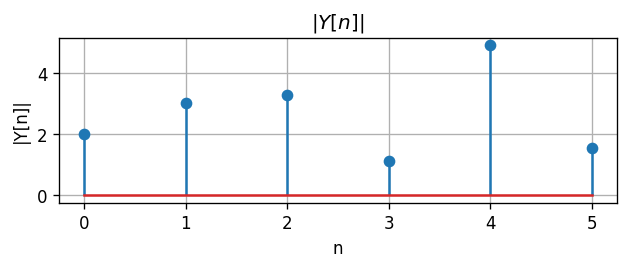

In [27]:
Y_array_anal = np.array (X_array) * np.exp (-np.pi * 1j * np.array (n_array))

plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.stem (n_array, abs (Y_array_anal), use_line_collection=True)
plt.xlabel("n")
plt.ylabel("|Y[n]|")
plt.title("$|Y[n]|$")
ax1.set_xticks(n_array)
plt.grid()
plt.show()
plt.close ()

## Задача 2.3. Энергия и мощность дискретного сигнала.

| Варианты:|$$X[0]$$| $X[1]$ | $X[2]$ | $X[3]$ | $X[4]$ | $X[5]$ |$$X[6]$$|
|:--------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
|  **1**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **2**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **3**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **4**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |
|  **5**  |  11  | $$-4-5j$$ | $$8-3j$$ |$$-2+9j$$ |$$-3+8j$$ | $$2-9j$$ |-4 |
|  **6**  |  10  | $$-6+3j$$ | $$6+3j$$ | $$6-1j$$ | $$1-6j$$ | $$9+5j$$ | 5 |

Пусть 
$$
X[n]= \sum_{k=0}^{11} x[k] \exp \left(-j \dfrac{2\pi}{N} nk \right)
$$
— 12-точечное ДПФ действительной последовательности $x[k]$ и пусть заданы бины ДПФ в соответствии с вариантом.

1) Воспользовавшись свойствами симметрии, определите значения всех отсчетов ДПФ на одном периоде. 

2) Определите среднее арифметическое значение элементов последовательности $x[k]$:
$$\dfrac{1}{N} \sum_{k=0}^{N-1} x[k]$$
 с использованием значения отсчета ДПФ с номером $n=0$.

3) С использованием равенства Парсеваля для ДПФ определить энергию дискретного сигнала $x[k]$

$$ \sum_{k=0}^{N-1} |x[k]|^2 $$

и мощность для его периодического продолжения с периодом 12
$$ \dfrac{1}{N} \sum_{k=0}^{N-1} |x[k]|^2. $$


4) Вычислите обратное ДПФ с помощью функции ```ifft```, а затем энергию и среднее арифметическое для $x[k]$. 
Сравните с результатами, полученными в п.2 и п.3.


In [28]:
N = 12
X_array = [10, 2 - 7 * 1j, 8 * 1j, 8 - 8 * 1j, 6 * 1j, -1 + 9 * 1j, 9]
                    

for num in range (int (N / 2 - 1), 0, -1):
    X_array.append (X_array[num].real - X_array[num].imag * 1j)
print (X_array)

[10, (2-7j), 8j, (8-8j), 6j, (-1+9j), 9, (-1-9j), -6j, (8+8j), -8j, (2+7j)]


In [29]:
energy = 0
for num in range (N):
    energy += abs (X_array[num]) ** 2
print (5 /6)
print (energy)
print (energy / N)

0.8333333333333334
907.0
75.58333333333333


[ 3.08333333+0.j -0.33771324+0.j  2.35405928+0.j -1.58333333+0.j
  5.43140954+0.j  2.83771324+0.j  0.08333333+0.j -3.53707198+0.j
  0.23525712+0.j  1.75      +0.j -1.68739261+0.j  1.37040531+0.j]


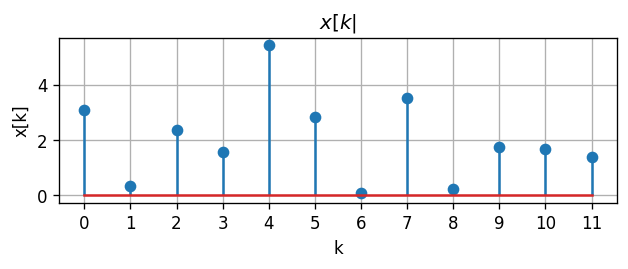

In [30]:
x_array = np.fft.ifft (X_array, N)
n_array = np.arange (N)
print (x_array)


plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.stem (n_array, abs (x_array), use_line_collection=True)
plt.xlabel("k")
plt.ylabel("x[k]")
plt.title("$x[k|$")
ax1.set_xticks(n_array)
plt.grid()
plt.show()
plt.close ()

In [31]:
mean = 0
for num in range (N):
    mean += x_array[num]

print (mean / N)

(0.8333333333333333+0j)


In [32]:
energy = 0
for num in range (N):
    energy += abs (X_array[num]) ** 2

print (energy)
print (energy / N)

907.0
75.58333333333333


N## Задача 2.4. ДПФ как коэффициенты разложения по базису

**ИСПРАВИТЬ!**

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 12 | 16 | 14 | 16 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  7 |  1 |
|   $r_2$   |  5 |  4 |  2 |  3 |  5 |  4 |

Вычислите коэффициенты $N$ – точечного ДПФ $X[n]$ для 
$$
\begin{equation} 
x[k]=\left\{\begin{array}{l}\cos \left( \dfrac{2\pi}{N} r_1 k\right) + \sin \left( \dfrac{2\pi}{N} r_2 k\right) ,\;0\leq k\leq N-1;\\0,\;\;\text{при других  } k.\end{array}\right.
\end{equation}
$$
при заданных $r_1$ и $r_2$ с помощью
 
 * формулы вычисления ДПФ
 * теоремы смещения для ДПФ 
 * как коэффиценты разложения сигнала $x[k]$ по базису из комплексно-экспоненциальных функций  $\varphi_n[k]=\exp(j \dfrac{2\pi}{N} n k)$
 * с помощью функции ```fft```
 
 Сравните результаты. Постройте графики для $|X[n]|$, $\angle X[n]$, $\text{Re } X[n]$, $\text{Im }X[n]$.

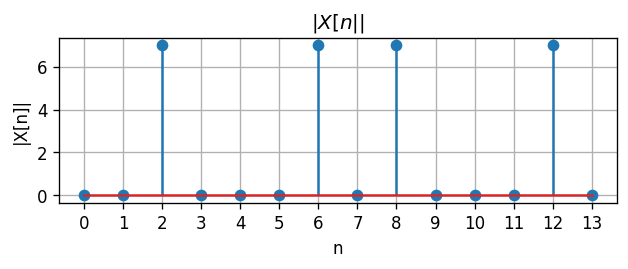

In [33]:
N = 14
r1 = 6
r2 = 2

x_array = np.array ([np.cos (2 * np.pi * r1 * k / N) + np.sin (2 * np.pi * r2 * k / N) for k in range (N)])
X_array = np.fft.fft (x_array, N)
n_array = np.arange (N)

plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.stem (n_array, abs (X_array), use_line_collection=True)
plt.xlabel("n")
plt.ylabel("|X[n]|")
plt.title("$|X[n||$")
ax1.set_xticks(n_array)
plt.grid()
plt.show()
plt.close ()

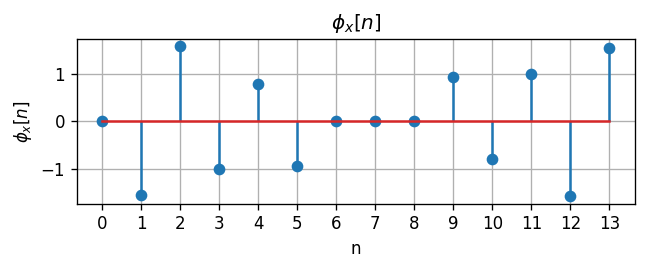

In [34]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.stem (n_array, np.arctan (X_array.imag / X_array.real), use_line_collection=True)
plt.xlabel("n")
plt.ylabel("$\\phi_x[n]$")
plt.title("$\\phi_x[n]$")
ax1.set_xticks(n_array)
plt.grid()
plt.show()
plt.close ()

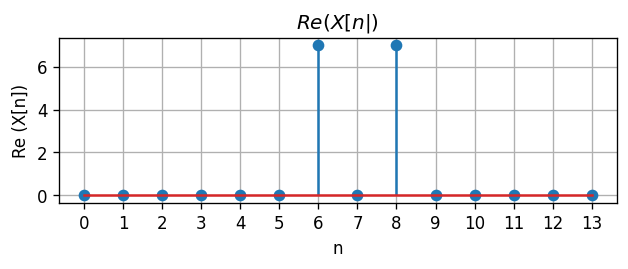

In [35]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.stem (n_array, X_array.real, use_line_collection=True)
plt.xlabel("n")
plt.ylabel("Re (X[n])")
plt.title("$Re (X[n|)$")
ax1.set_xticks(n_array)
plt.grid()
plt.show()
plt.close ()

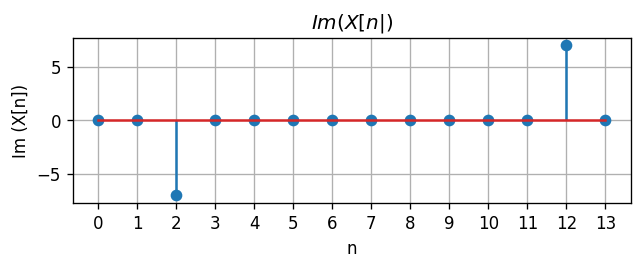

In [36]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.stem (n_array, X_array.imag, use_line_collection=True)
plt.xlabel("n")
plt.ylabel("Im (X[n])")
plt.title("$Im (X[n|)$")
ax1.set_xticks(n_array)
plt.grid()
plt.show()
plt.close ()

# Модуль 3. Связь между ДПФ и ДВПФ. Частотная ось ДПФ.

## Задача 3.1. Связь ДПФ и ДВПФ для последовательностей конечной длительности.  
##Прямоугольное окно длиной N

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 20 | 18 | 16 | 14 | 12 |
  
Дана 16-точечная последовательность $w[k]=\sum_{m=0}^{N-1} \mathbf{1} [k-m]$.  

* Изобразить график последовательности $w[k]$ средствами Python
* Вычислить с помощью `fft` ДПФ данной последовательности. Построить график.
* Дополнить последовательность $w[k]$ до $2N$ отсчетов нулями:
$$
y[k]=\left\{\begin{array}{l}
1, \text{при }  0 \le k \le N-1;
\\
0, \text{при } N \le k \le 2N-1.
\end{array}\right.
$$
При том изменяется только учитываемая длительность последовательности, влияющая на число отсчетов ДПФ.    
Сравнить результат работы `fft(w, 2*N)` c ДПФ для $y[k]$. Построить графики. 

* Повторить предыдущий пункт для последовательности $w[k]$ дополненой нулями до $4N$ отсчетов.

* Вычислить аналитически ДВПФ с помощью формулы прямого преобразования:
$$ X(\nu)= \sum_{k=-\infty}^{\infty} x[k]\exp(-j2\pi \nu k) $$  
Сравнить результат с работой функции `fft(w, 1024)`

* Построить график модуля ДВПФ $|X(\nu)|$ на отрезке $[-0.5, 0.5]$, используя функцию `fftshift`.



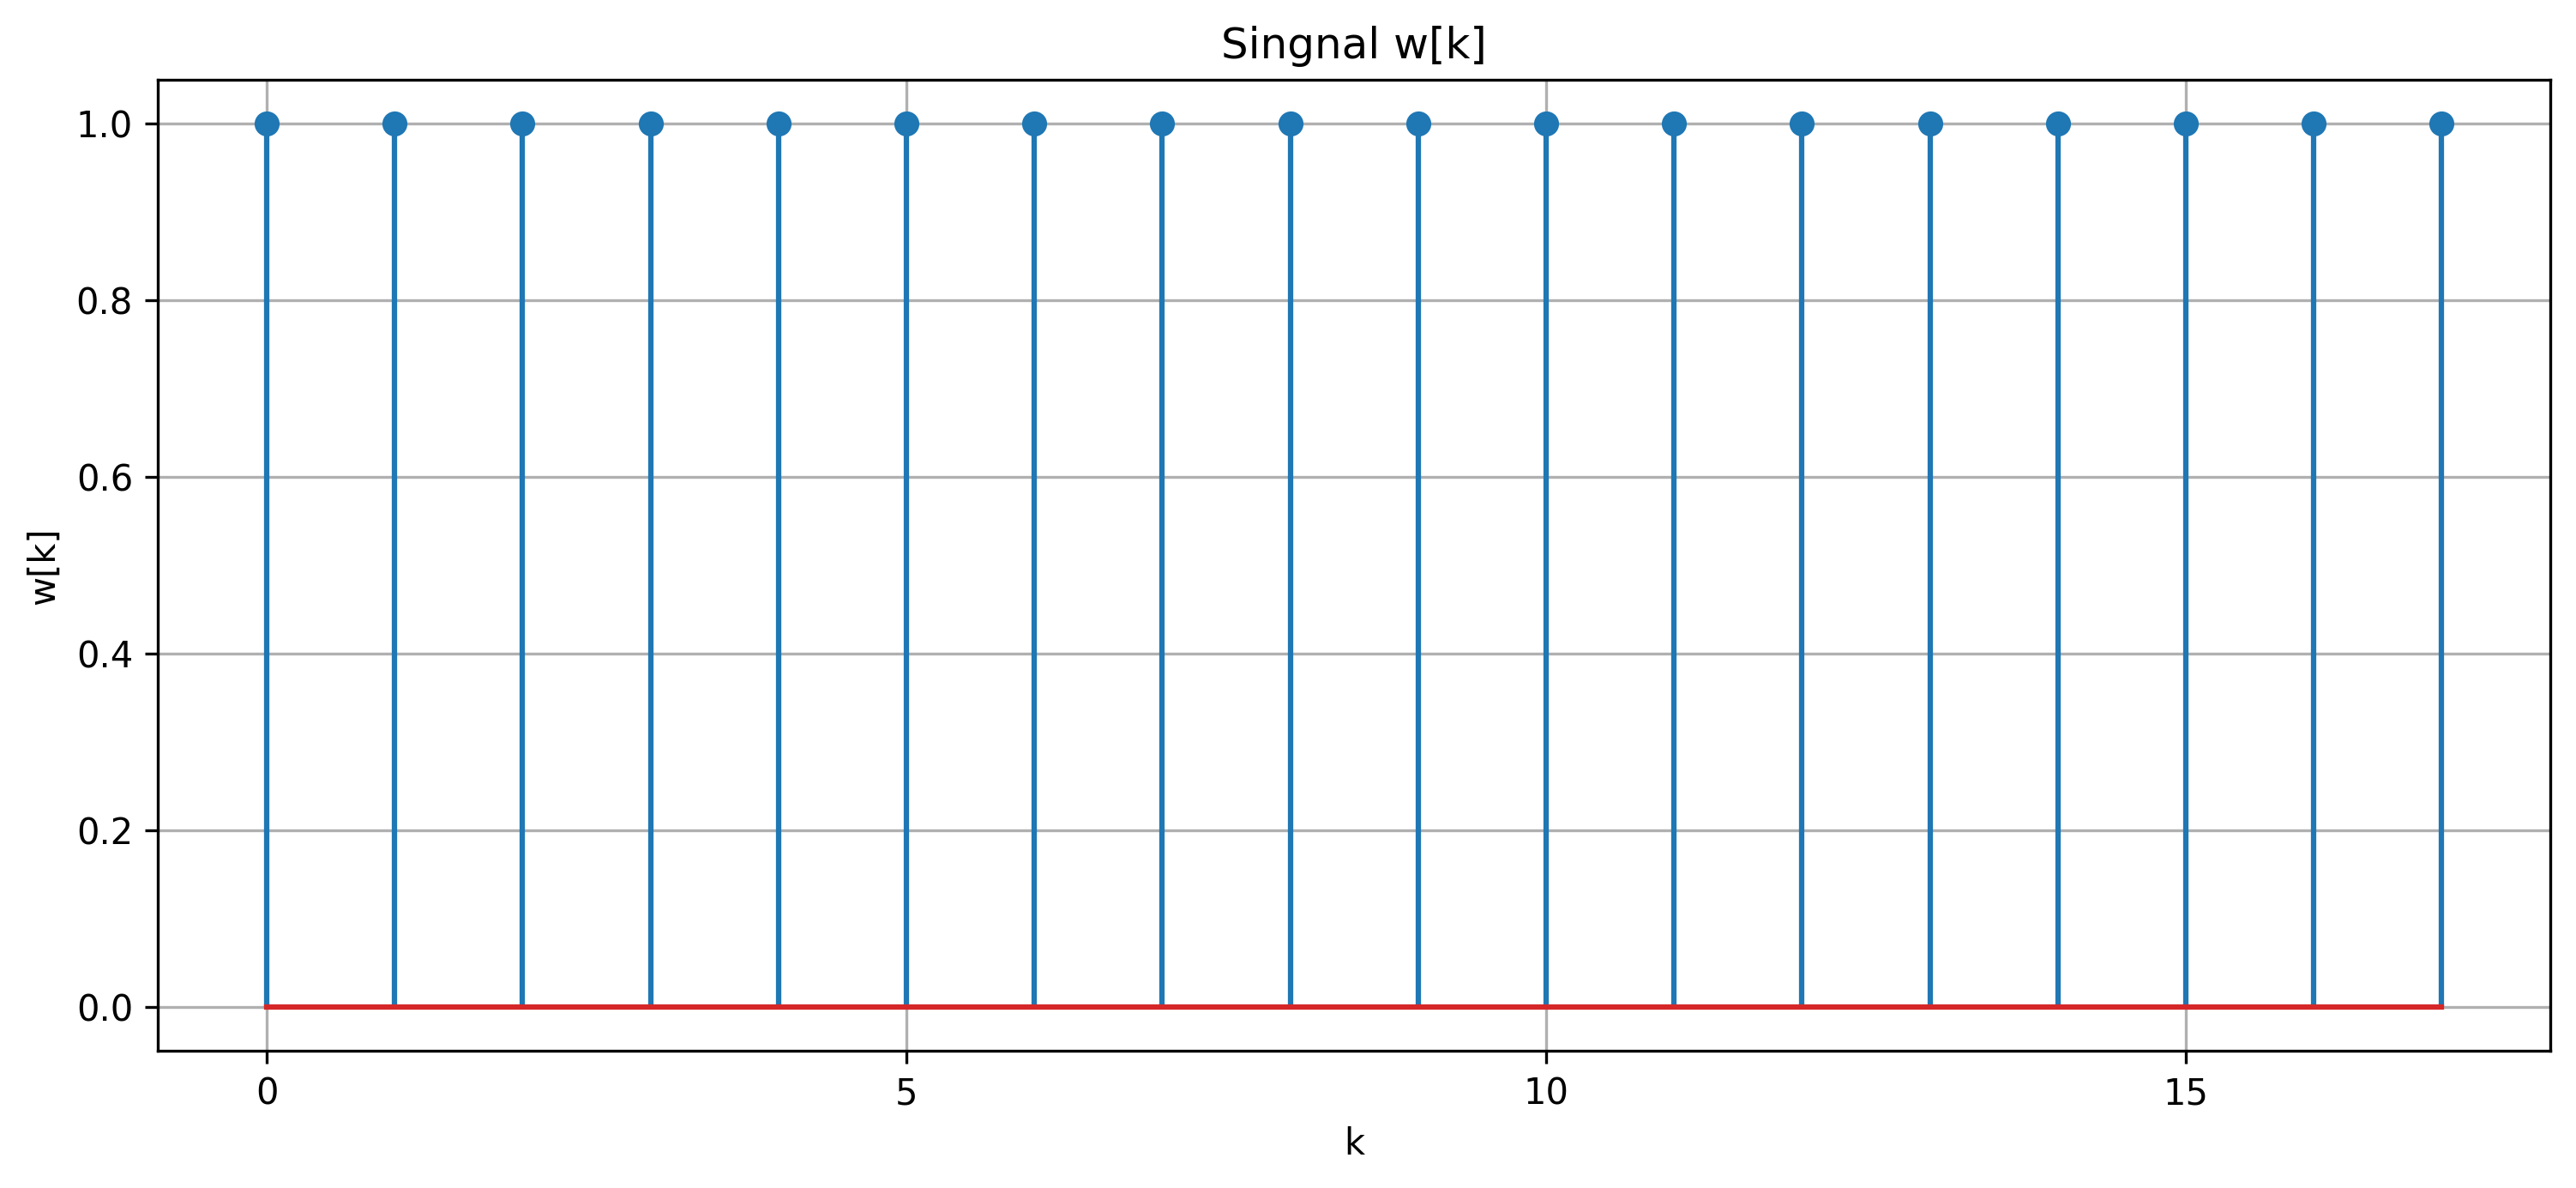

In [37]:
N = 18

k_arr = np.arange (N)
w_arr = np.ones (N) 


plt.figure(figsize=[12, 5], dpi=300)
plt.stem (k_arr, w_arr, use_line_collection=True)
plt.xlabel("k")
plt.ylabel("w[k]")
plt.xticks(ticks=np.arange(0, k_arr.size, 5))
plt.title("Singnal w[k]")
plt.grid()
plt.show()
plt.close ()


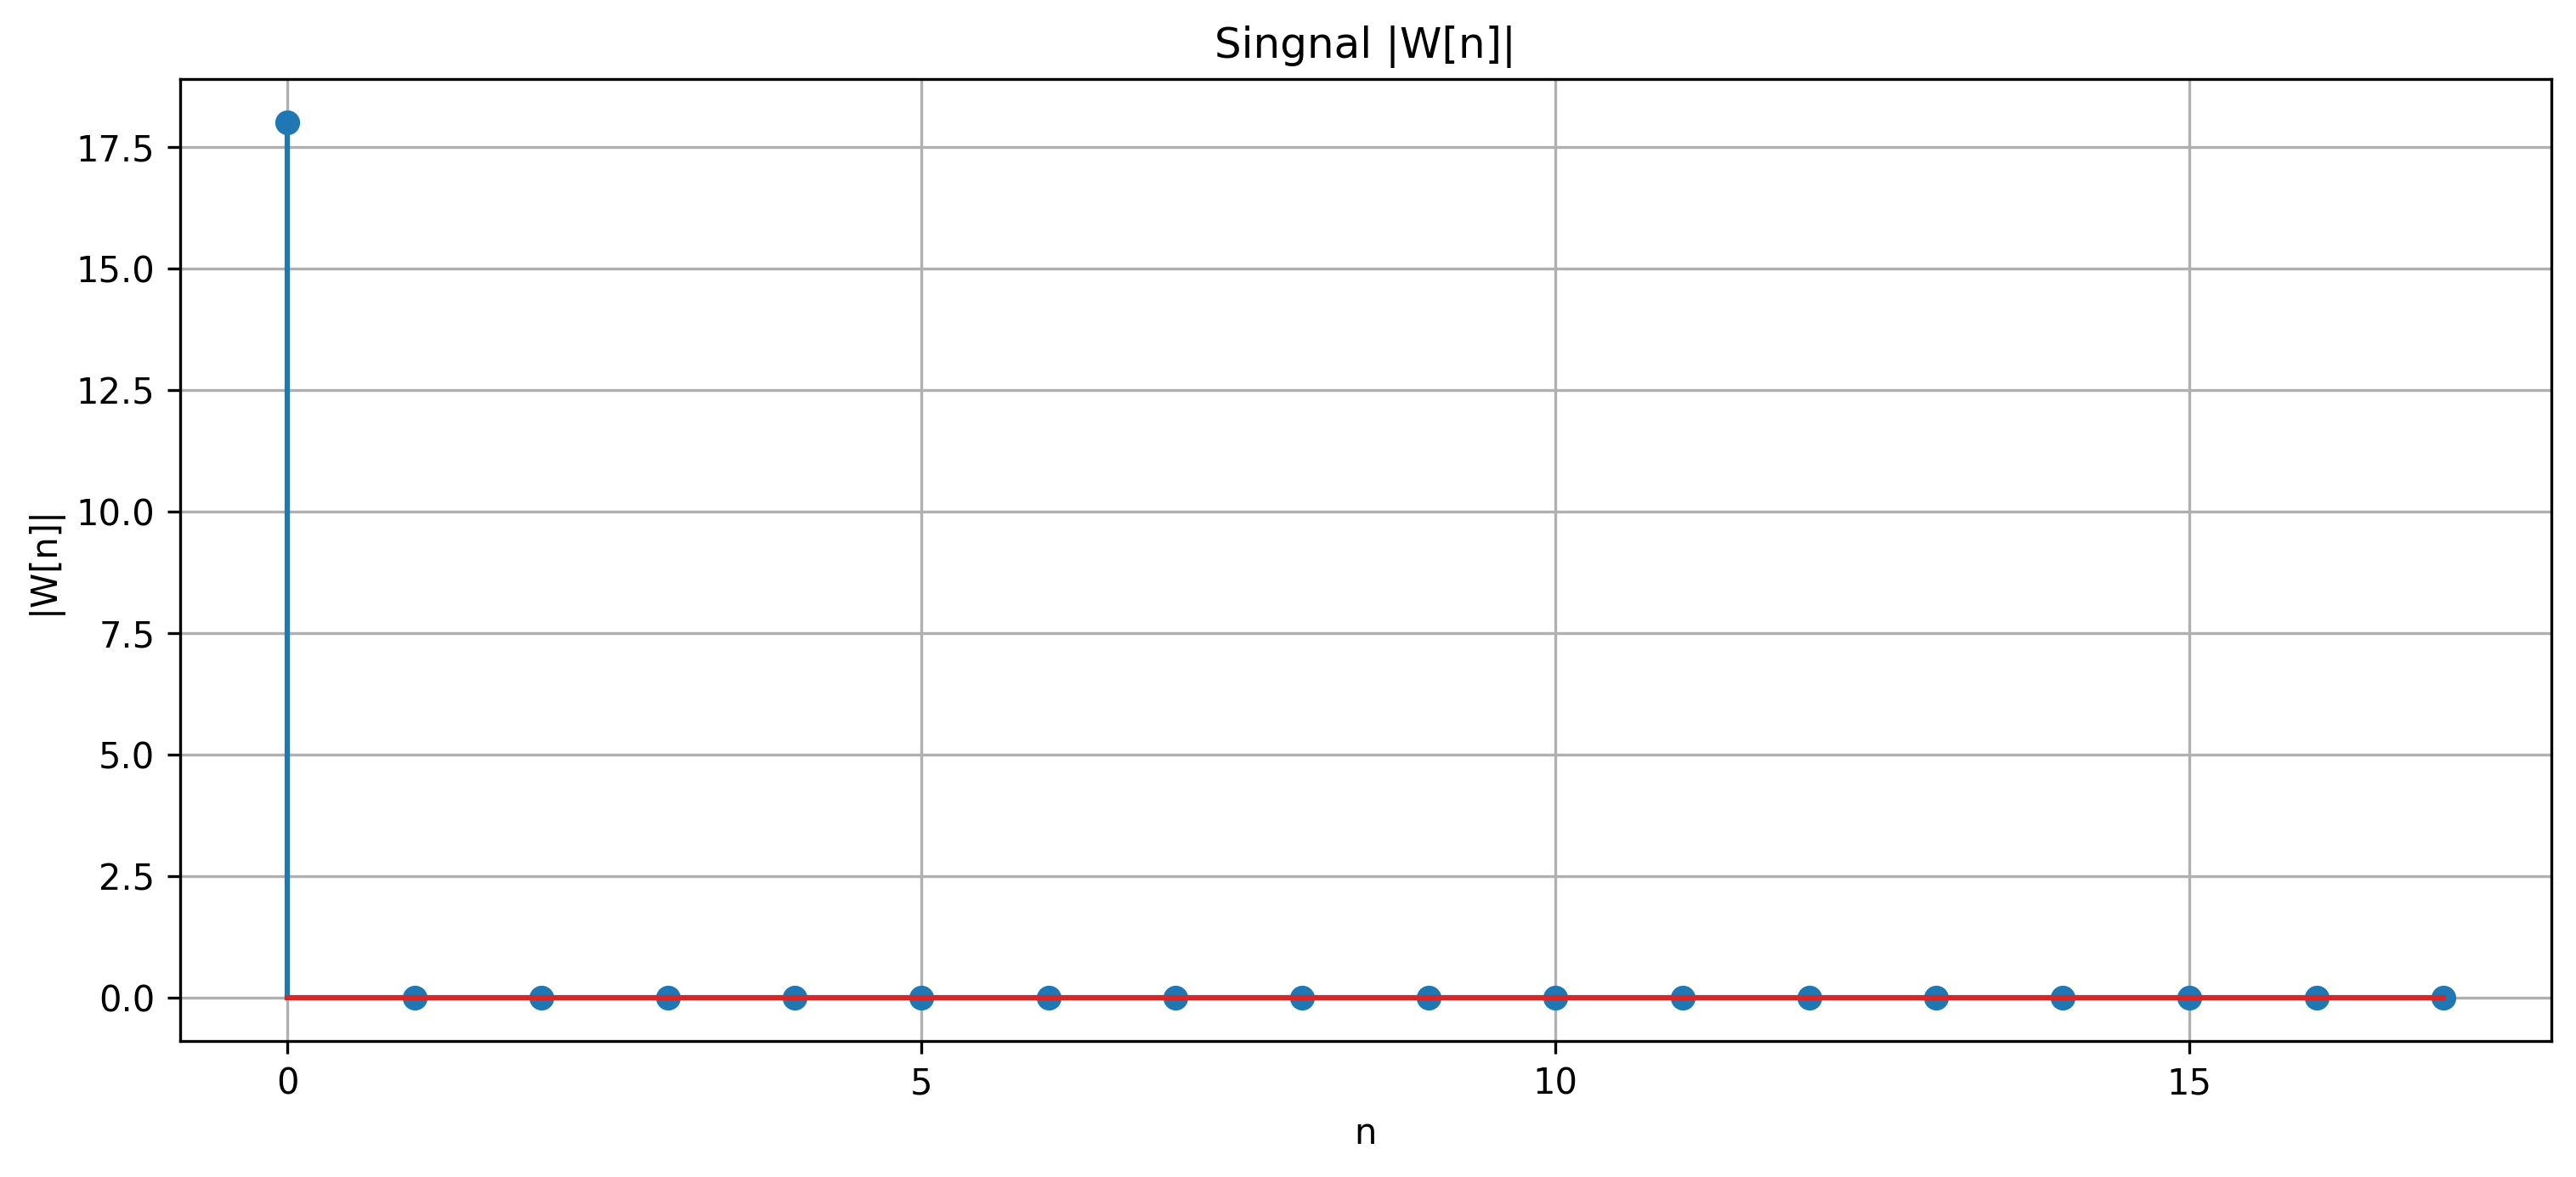

In [38]:
W_arr = np.fft.fft (w_arr, N) 


plt.figure(figsize=[12, 5], dpi=300)
plt.stem (k_arr, abs (W_arr), use_line_collection=True)
plt.xlabel("n")
plt.ylabel("|W[n]|")
plt.xticks(ticks=np.arange(0, k_arr.size, 5))
plt.title("Singnal |W[n]|")
plt.grid()
plt.show()
plt.close ()

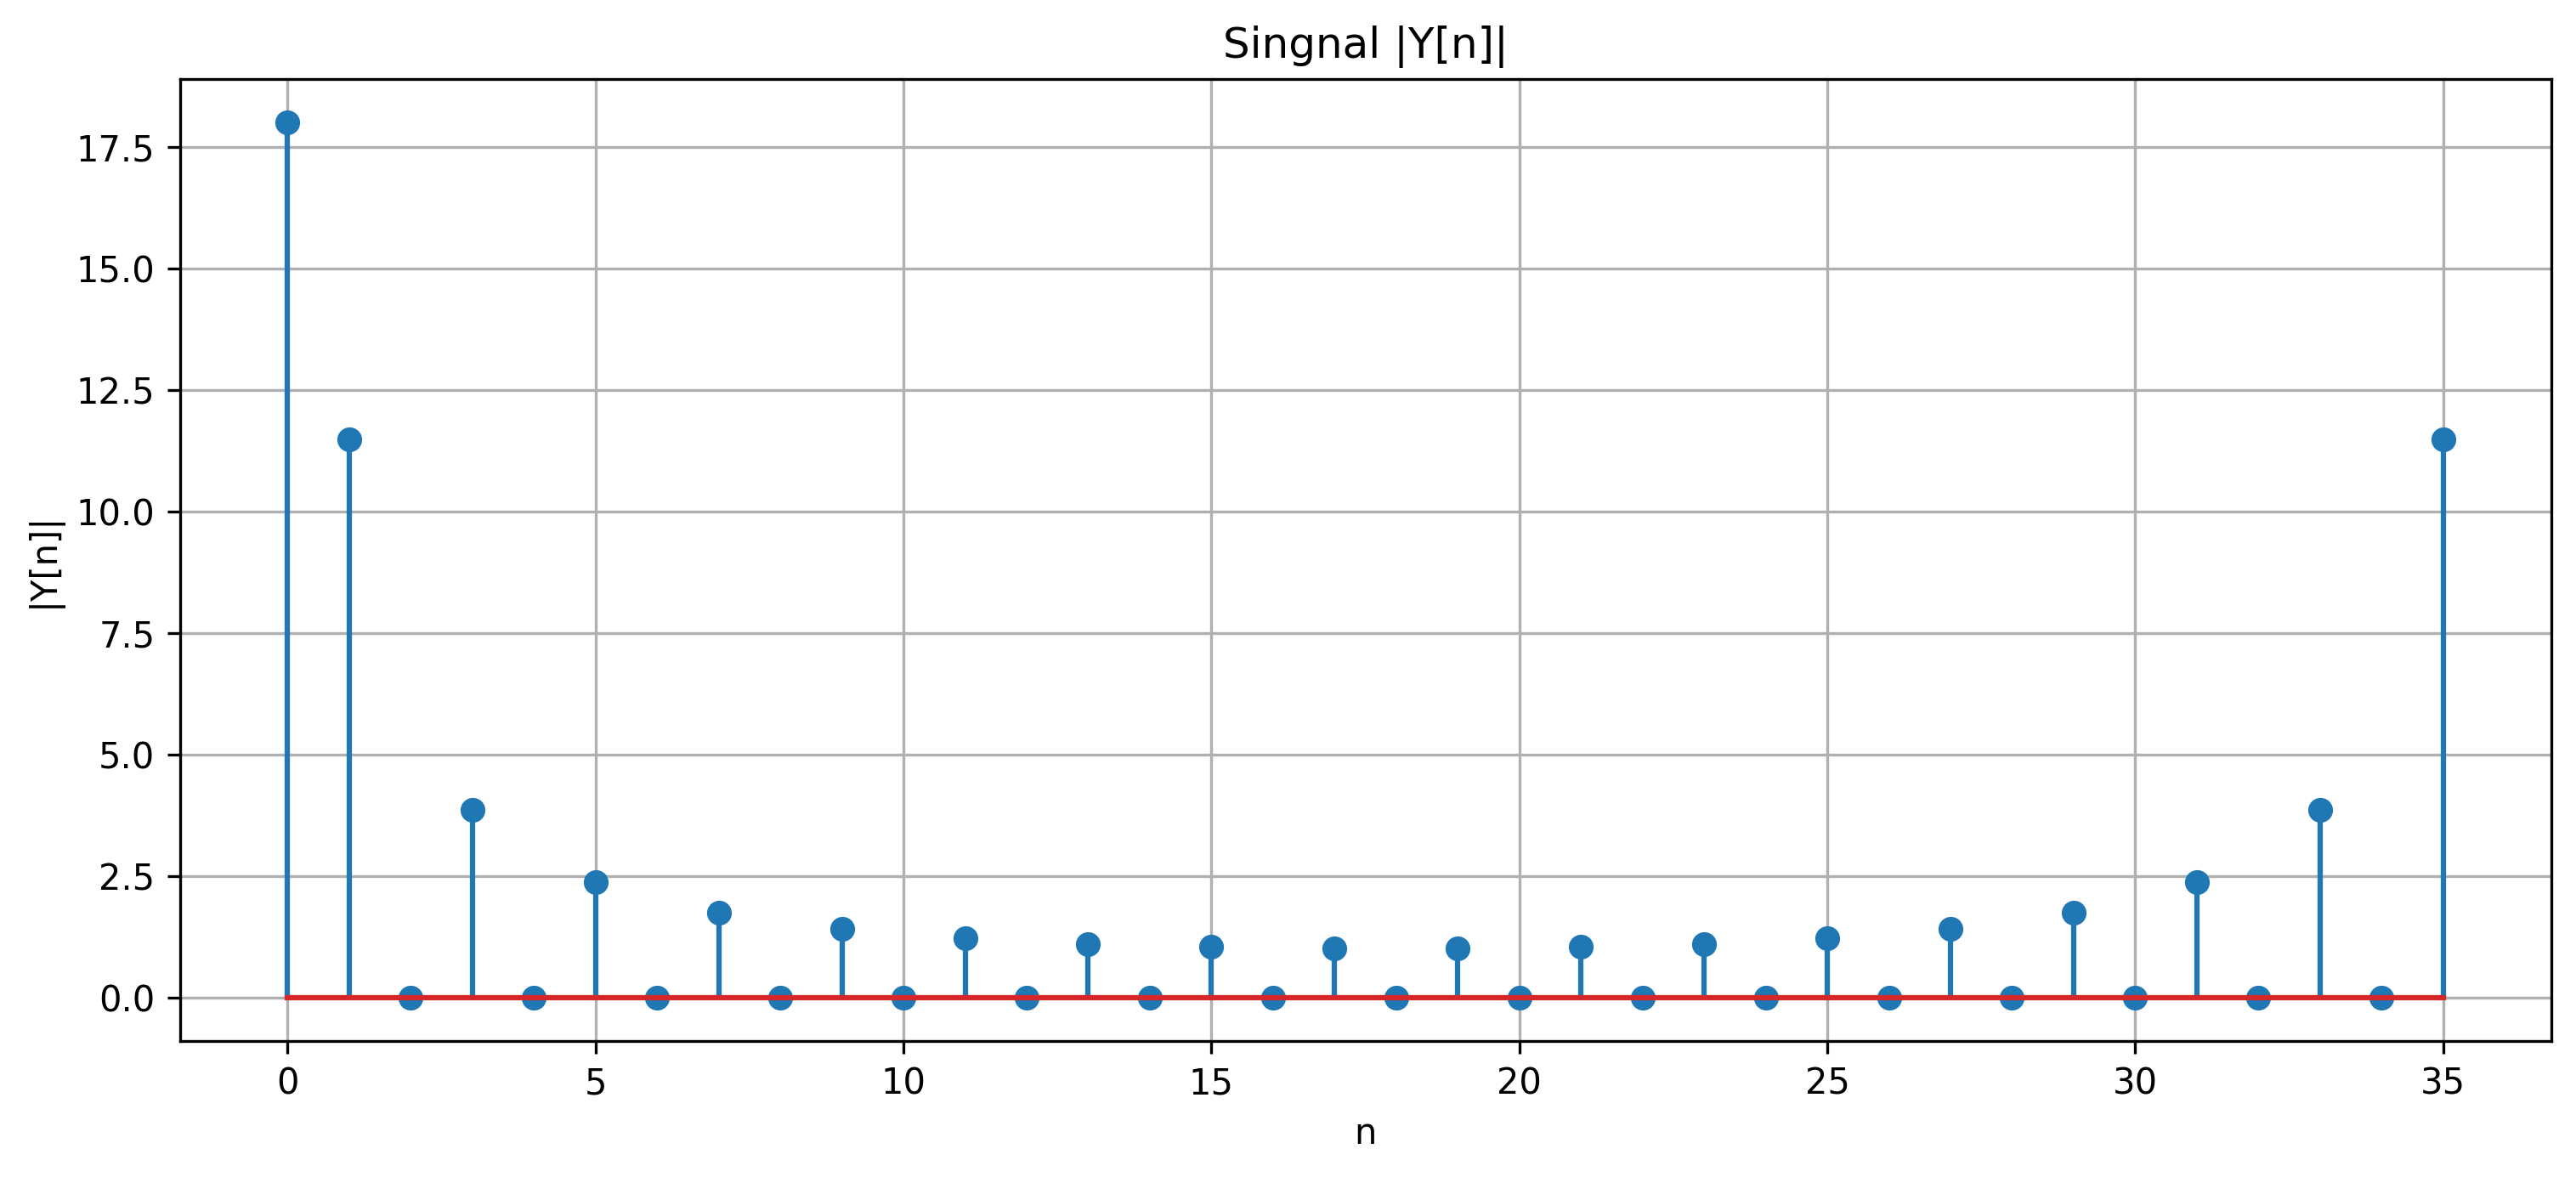

In [39]:
y_arr = [w_arr[ind] if ind < N else 0 for ind in range (2 * N)]
Y_arr = np.fft.fft (y_arr, 2 * N) 
k_arr_long = np.array ([ind for ind in range (2 * N)])

plt.figure(figsize=[12, 5], dpi=300)
plt.stem (k_arr_long, abs (Y_arr), use_line_collection=True)
plt.xlabel("n")
plt.ylabel("|Y[n]|")
plt.xticks(ticks=np.arange(0, k_arr_long.size, 5))
plt.title("Singnal |Y[n]|")
plt.grid()
plt.show()
plt.close ()

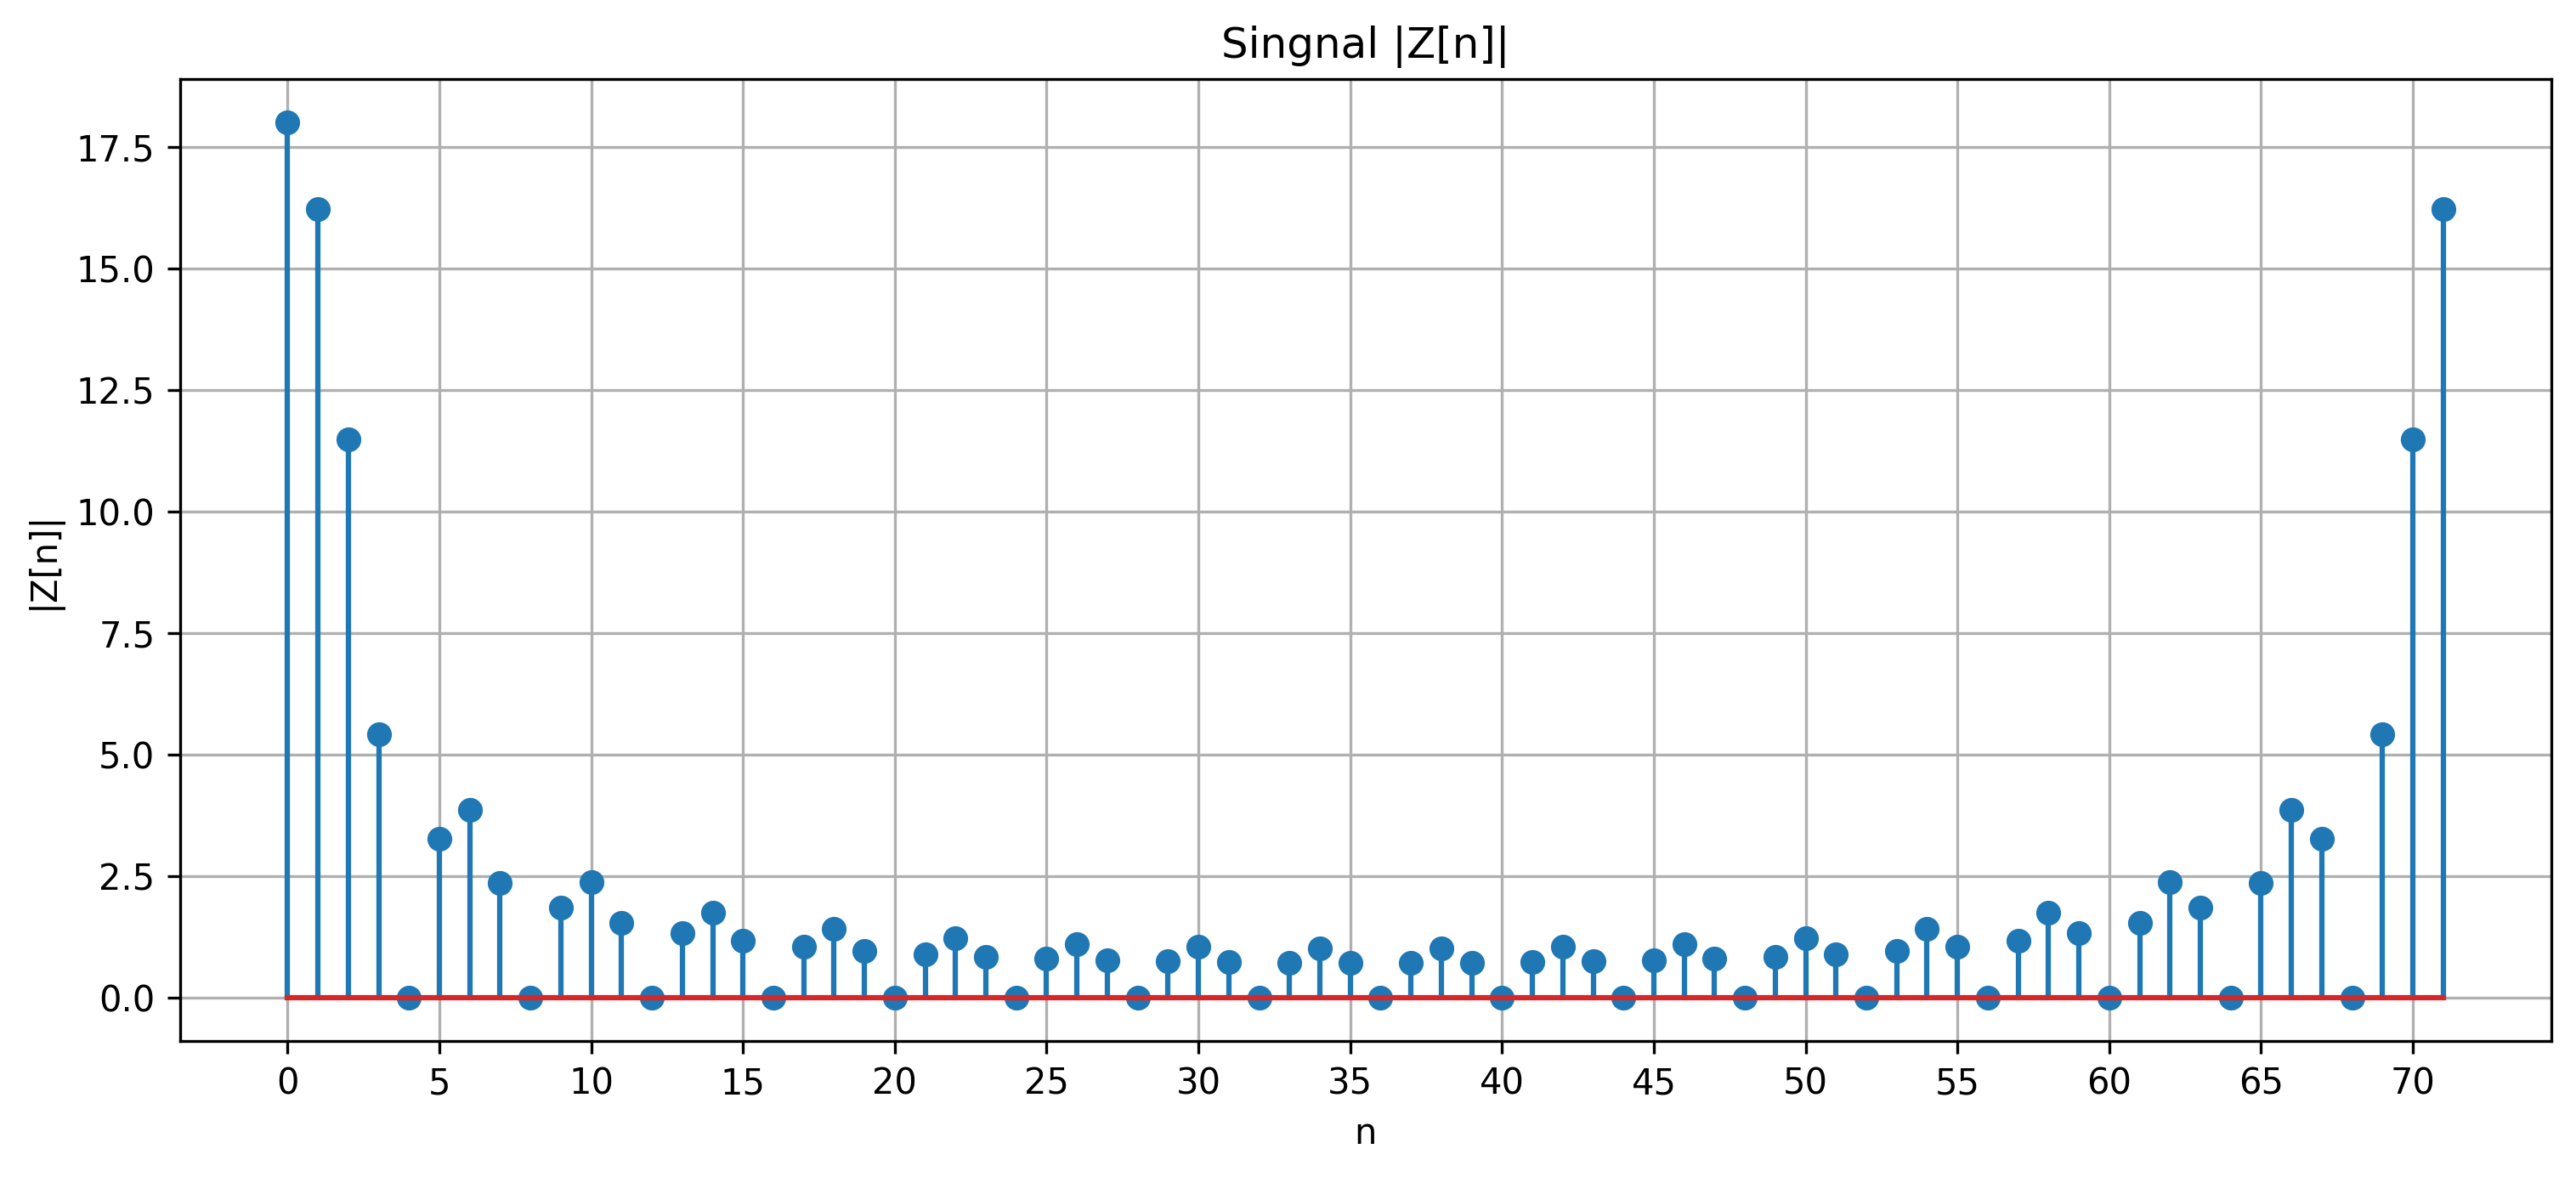

In [40]:
z_arr = [w_arr[ind] if ind < N else 0 for ind in range (4 * N)]
Z_arr = np.fft.fft (z_arr, 4 * N) 
k_arr_4x = np.array ([ind for ind in range (4 * N)])

plt.figure(figsize=[12, 5], dpi=300)
plt.stem (k_arr_4x, abs (Z_arr), use_line_collection=True)
plt.xlabel("n")
plt.ylabel("|Z[n]|")
plt.xticks(ticks=np.arange(0, k_arr_4x.size, 5))
plt.title("Singnal |Z[n]|")
plt.grid()
plt.show()
plt.close ()

In [41]:
def dftf_new(x, M=1024):
  return np.arange (M) / M, np.fft.fft(x, M)

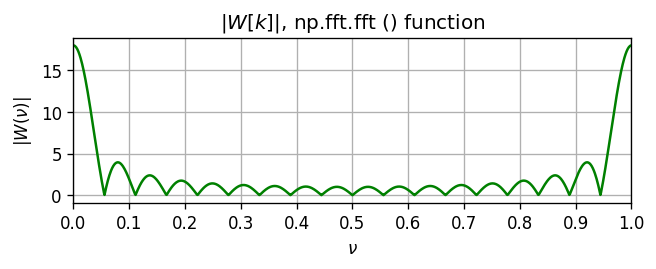

In [42]:
nu_arr, W_arr_long = dftf_new (w_arr, 1024)
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu_arr, abs(W_arr_long), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|W(\\nu)|$")
plt.xlim([0, 1])
plt.title("$|W[k]|$, np.fft.fft () function")
plt.grid()

In [43]:
def get_spectrum_new (nu, N):
  if np.sin (np.pi * nu) == 0:
    return N
  return np.exp (-1j * np.pi * nu * (N - 1)) * np.sin (np.pi * nu * N) / np.sin (np.pi * nu)

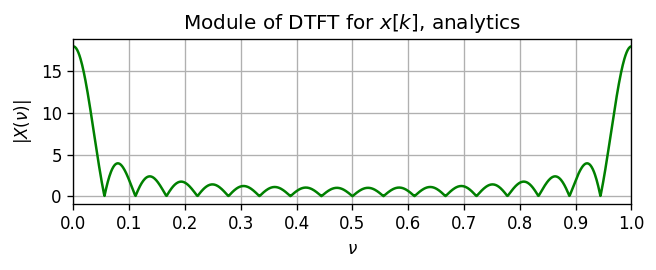

In [44]:
W_anal = np.array ([get_spectrum_new (nu_value, N) for nu_value in nu_arr])
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu_arr, abs(W_anal), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|X(\\nu)|$")
plt.xlim([0, 1])
plt.title("Module of DTFT for $x[k]$, analytics")
plt.grid()

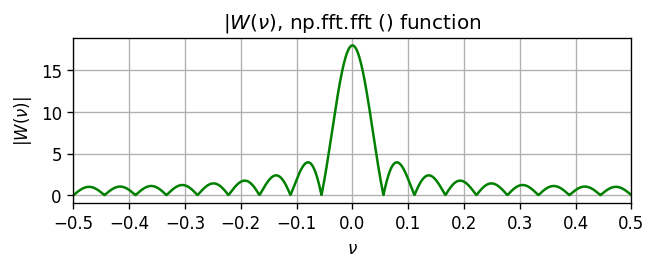

In [45]:
nu_arr, W_arr_long = dftf (w_arr, 1024)
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu_arr, abs(W_arr_long), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|W(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("$|W(\\nu)$, np.fft.fft () function")
plt.grid()

## Задача 3.2. Связь между ДВПФ и ДПФ для периодических последовательностей. 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 12 | 14 | 16 | 14 | 12 |
|   $r_1$   |  3 |  2 |  6 |  7 |  6 |  1 |
|   $r_2$   |  7 |  4 |  2 |  3 |  4 |  4 |

Задана периодическая последовательность с периодом $N$
$$x[k]=\sin(2\pi k r_1/N)+\cos(2\pi k r_2/N).$$ 
* Вычислите аналитически ДВПФ
* Вычислите с помощью моделирования $N$—точечное ДПФ этой последовательности $\tilde{X} [n]$ (с нормировкой на число отсчетов). 

* Сравните веса $\delta$-функций в ДВПФ и величины отсчетов ДПФ.

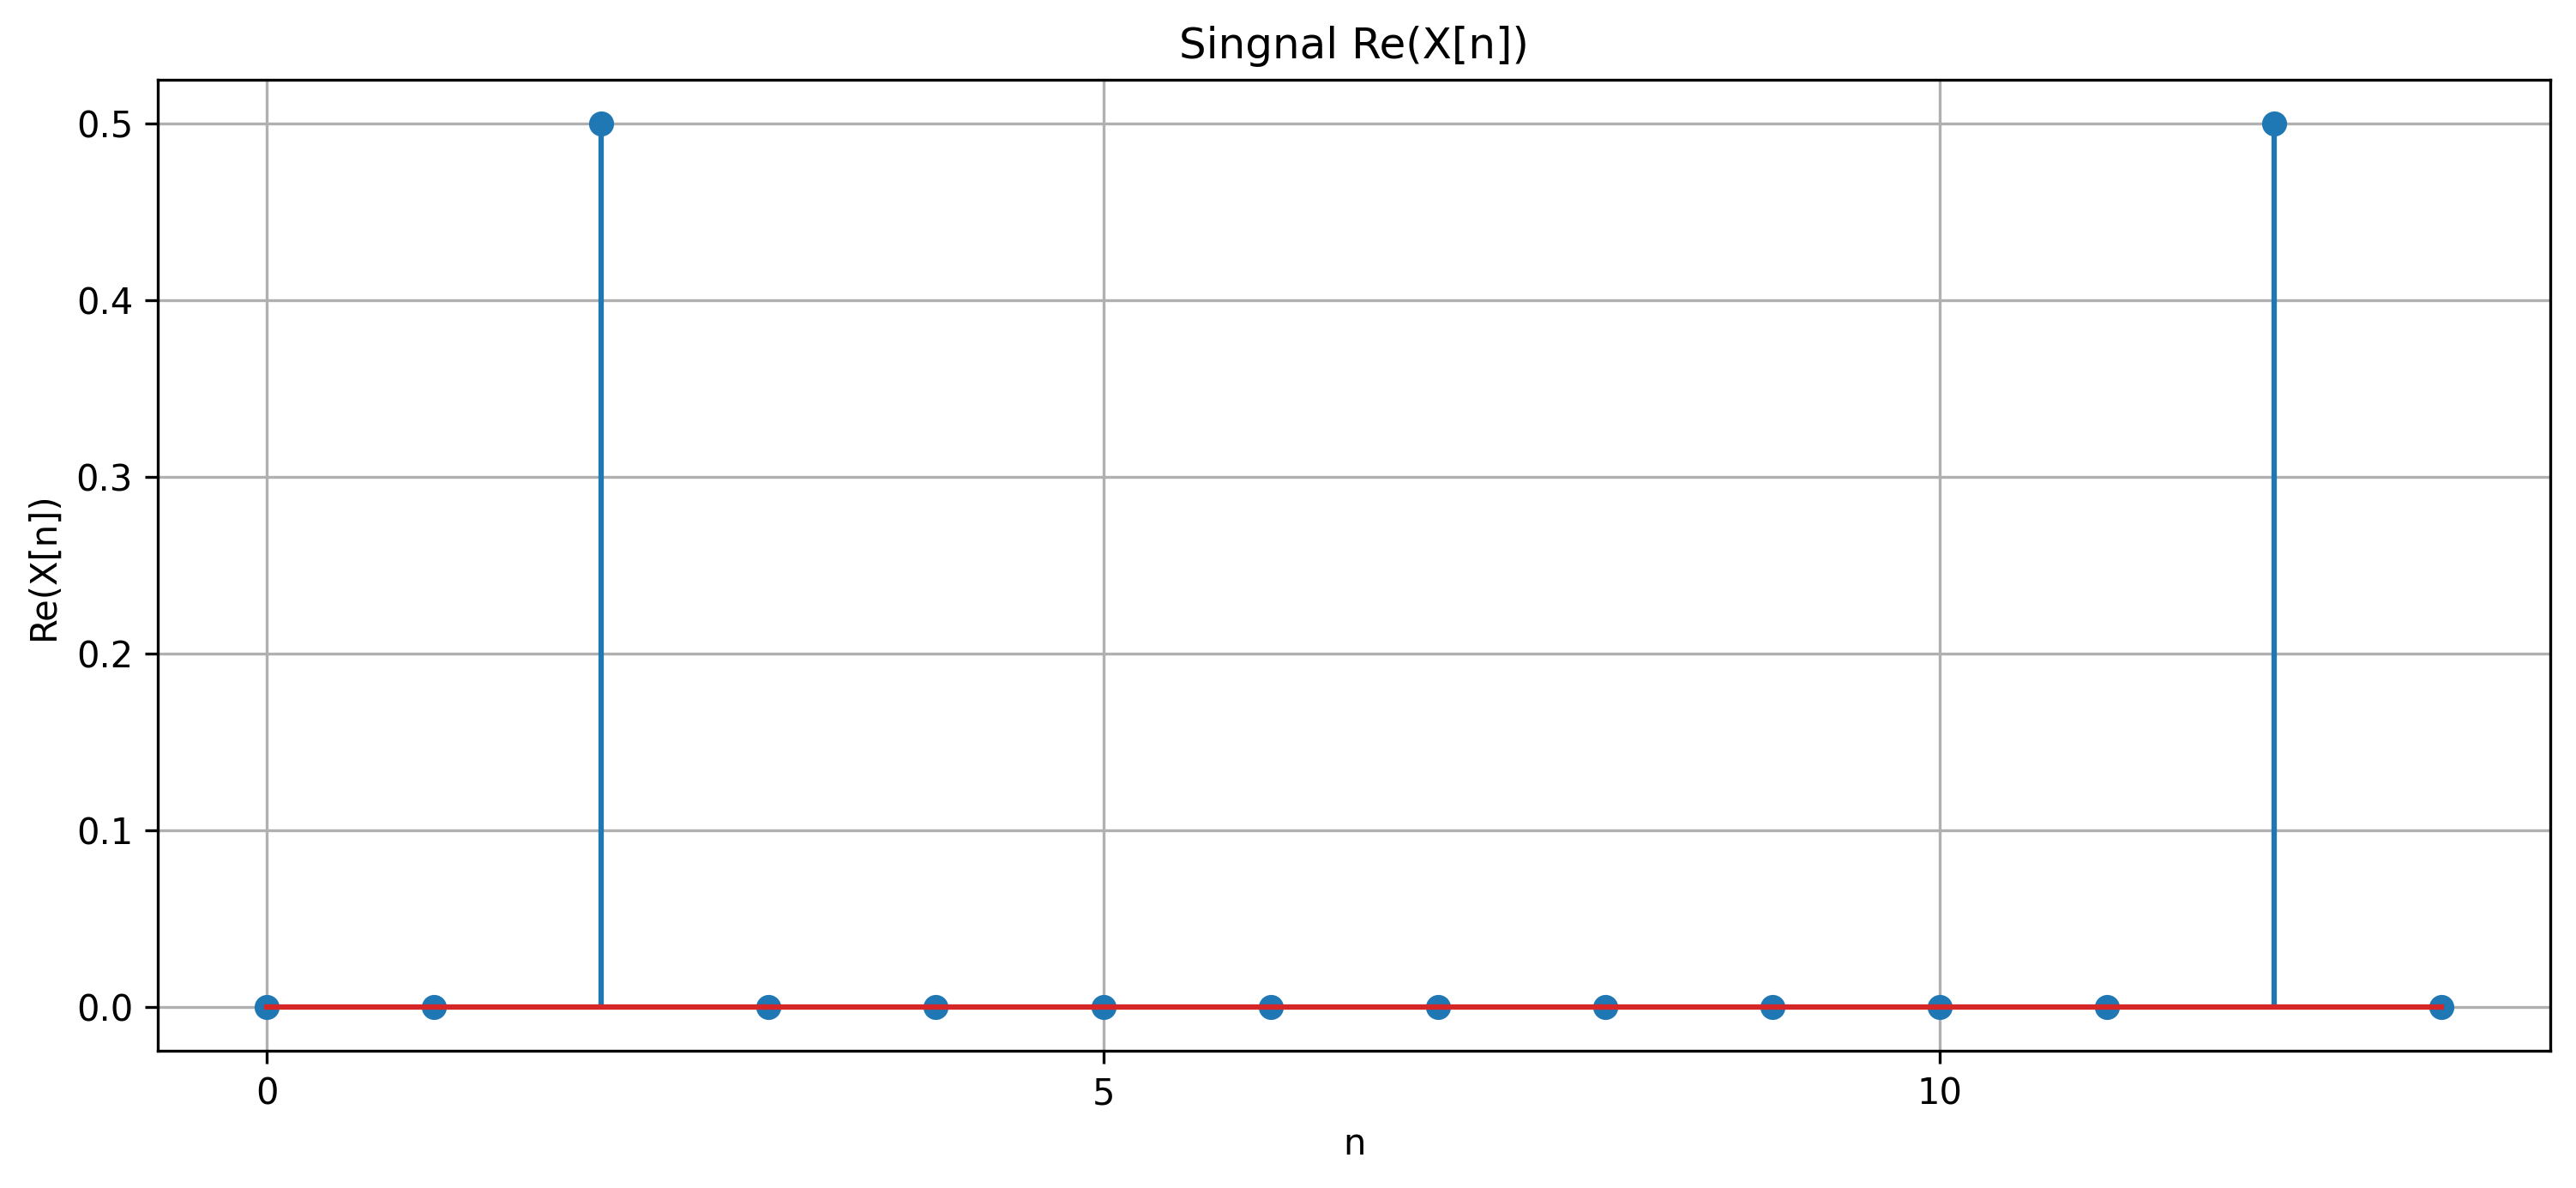

In [46]:
N = 14
r1 = 6
r2 = 2

x = np.array ([np.sin (2 * np.pi * k * r1 / N) + np.cos (2 * np.pi * k * r2 / N) for k in range (N)])
X = np.fft.fft (x) / N
n = np.arange (N)

plt.figure(figsize=[12, 5], dpi=300)
plt.stem (n, X.real, use_line_collection=True)
plt.xlabel("n")
plt.ylabel("Re(X[n])")
plt.xticks(ticks=np.arange(0, n.size, 5))
plt.title("Singnal Re(X[n])")
plt.grid()
plt.show()
plt.close ()


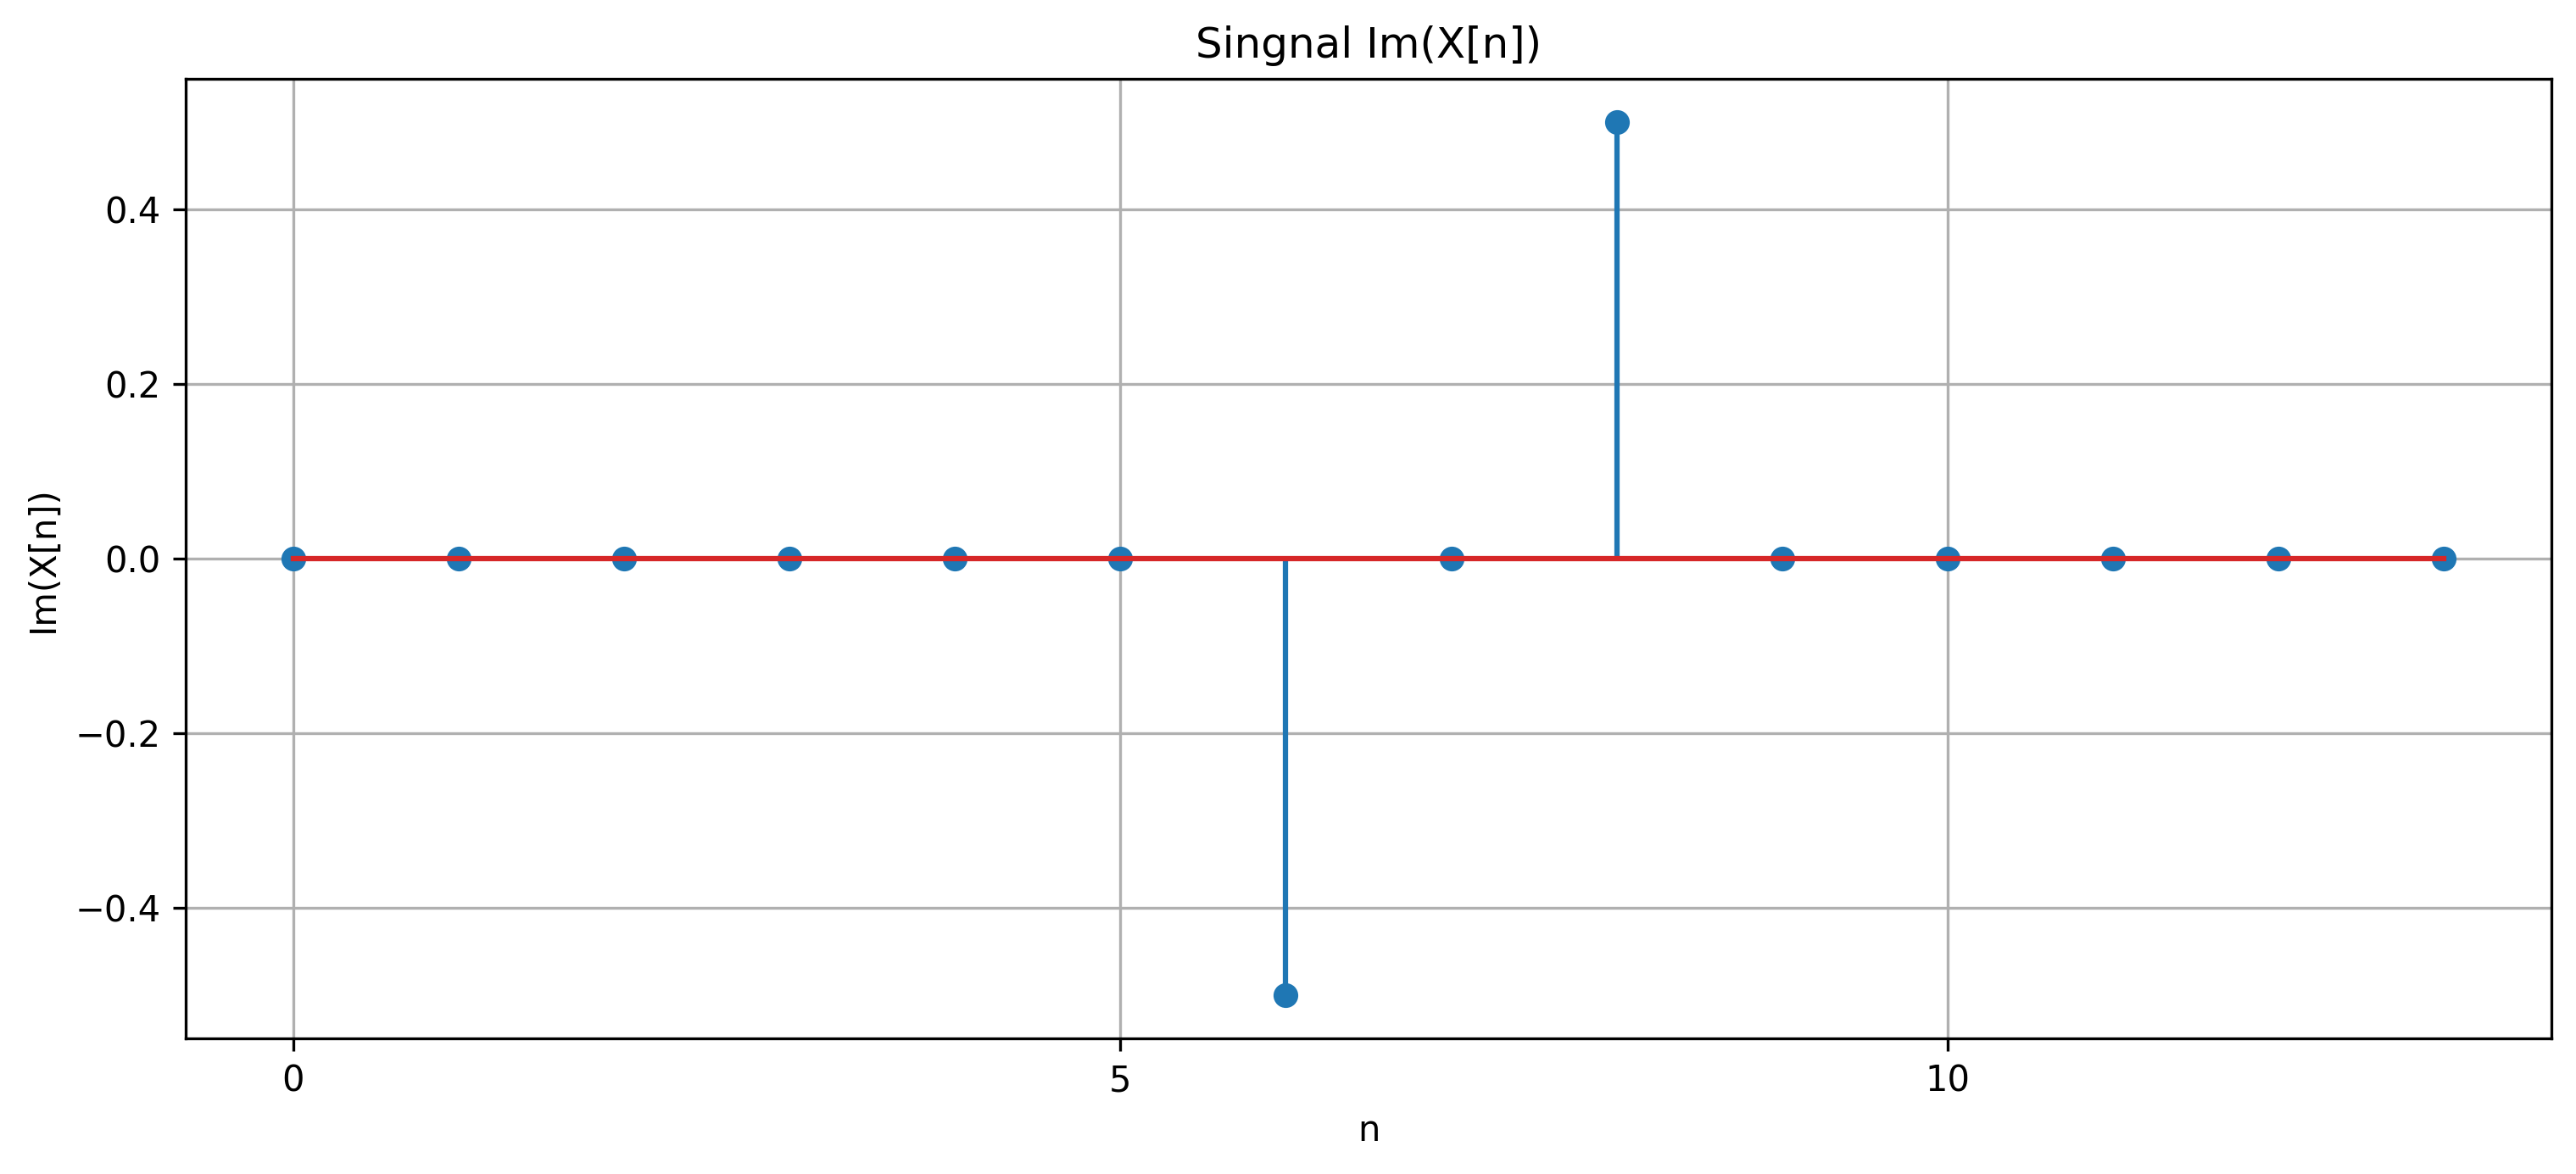

In [47]:

plt.figure(figsize=[12, 5], dpi=300)
plt.stem (n, X.imag, use_line_collection=True)
plt.xlabel("n")
plt.ylabel("Im(X[n])")
plt.xticks(ticks=np.arange(0, n.size, 5))
plt.title("Singnal Im(X[n])")
plt.grid()
plt.show()
plt.close ()

## Задача 3.3. Сравнение вычислительной эффективности

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   |   512 |   512 |   256 |   256 |   512 |   512 |
|   **P**   | 32768 | 32768 | 65536 | 65536 | 32768 | 65536 |

Дана $N$-точечная последовательность отсчетов
$$ x[k]= \sin(2\pi kn_0/N)$$  
Посчитать ДВПФ с использованием Python в $P$ точках для этой последовательности, где $n_0$ выбранное вами целое число на отрезке $ 0 < n_0 < N/2 $
* используя формулы ДВПФ напрямую, 
* используя БПФ `fft(x, P)`. 

Сравнить максимальную ошибку и время работы программы в двух случаях. Построить график $|X(\nu)|$.

In [51]:
def dft (x, N):
  y = np.array ([0 * 1j] * N)

  x_stop = 0
  for k in range (len (x) - 1, -1, -1):
    if x[k] != 0:
      x_stop = k + 1
      break

  for n in range (N):
    for k in range (x_stop):
        y[n] += x[k] * np.exp (-1j * 2 * np.pi * n * k / N)  
  return y

def dftf_legacy(x, M=1024):
  return -0.5 + np.arange(M)/M, np.fft.fftshift(dft(x, M))



def sin_spectrum (nu, N, n0):
  return (-1j / 2) * (get_spectrum_new (nu - n0 / N, N) - get_spectrum_new (nu + n0 / N, N))  

In [52]:
import time

n0 = 2
N = 256
P = 65536

x = [np.sin (2 * np.pi * k * n0 / N) if k < N else 0 for k in range (P)]

start_time = time.time ()
nu, X_legacy = dftf_legacy (x, P)
print("{} seconds".format (time.time () - start_time))

X_anal = np.array ([sin_spectrum (nu_value, N, n0) for nu_value in nu])



79.84184145927429 seconds


In [66]:
print (abs (max (X_legacy - X_anal)))

7.2121872764924045e-12


In [67]:
start_time = time.time ()
nu, X_fft = dftf (x, P)
print("{} seconds".format (time.time () - start_time))

print (abs (max (X_fft - X_anal)))

0.015633106231689453 seconds
4.7831115893438003e-14


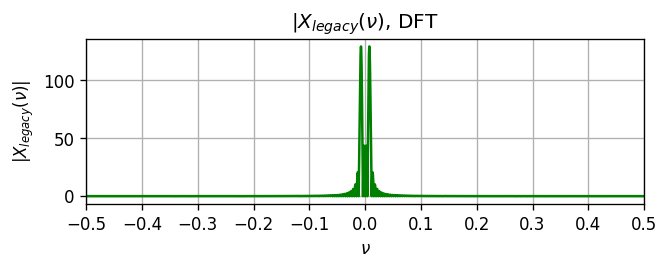

In [68]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(X_legacy), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|X_{legacy}(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("$|X_{legacy}(\\nu)$, DFT")
plt.grid()

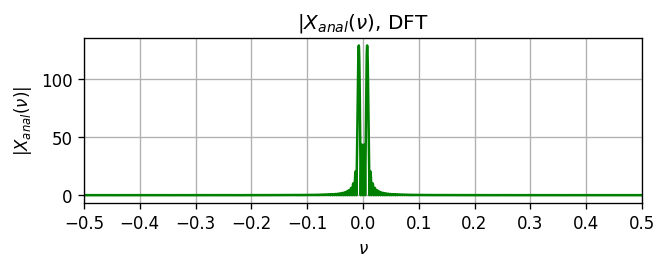

In [69]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(X_anal), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|X_{anal}(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("$|X_{anal}(\\nu)$, DFT")
plt.grid()

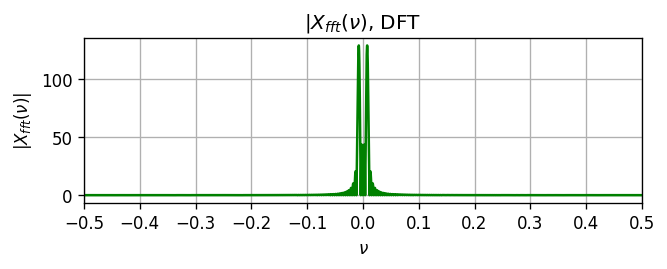

In [71]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(X_fft), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|X_{fft}(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("$|X_{fft}(\\nu)$, DFT")
plt.grid()

## Задача 3.4. Частотная ось ДПФ (соответствие номеров отсчетов и частот).

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`vibraphone.wav`|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|`flute.wav`|

Для аудиозаписи вашего варианта:
* указать шаг и частоту дискретизации; 
* выбрать некоторый интервал отсчетов в информативной области сигнала и для него осуществить ДПФ-анализ, объяснить выбор этой области;
* определить с помощью ДПФ-анализа частоту основого колебания.

In [84]:
import scipy.io.wavfile
from IPython.display import Audio
Audio('/content/sample_data/glockenspiel.wav')

In [89]:
fs, x1 = scipy.io.wavfile.read('/content/sample_data/glockenspiel.wav')
print ("$fs = {} Hz; dT = {} s$".format (fs, 1 / fs))

$fs = 96000 Hz; dT = 1.0416666666666666e-05 s$


In [91]:
num_samples = x1.size
duration = num_samples / fs
duration

1.3476354166666666

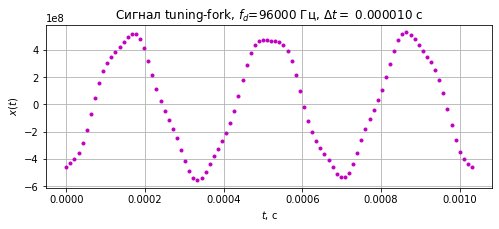

In [94]:
time_duration=100
time_delay=10000
x=x1[time_delay:(time_delay+time_duration)]
plt.figure(figsize=[8, 3])
plt.plot(np.arange(x.size)/fs, x, 'm.')
plt.xlabel(u'$t$, c')
plt.ylabel(u'$x(t)$')
plt.title('Сигнал tuning-fork, $f_d$=%i Гц, $\Delta t=$ %f c' %(fs, 1.0/fs))
plt.grid()

Как видно, период равен примерно 0.00035 с. Поэтому главная частота равна примерно 2860 Гц - окрестность этой области и будем рассматривать. Из результатов также видно, что если сделаем несколько тысяч отсчётов, то это захватит довольно много периодов.

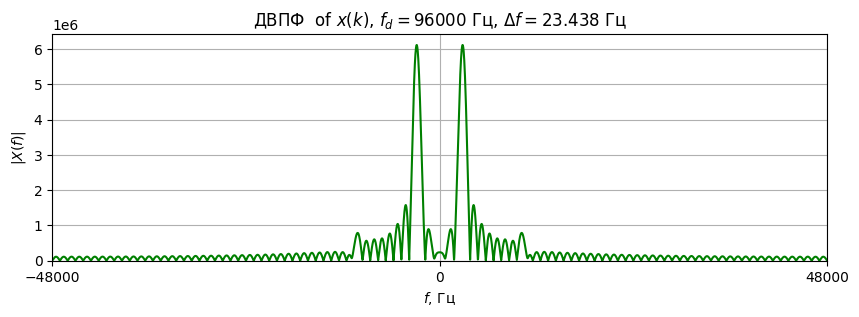

In [108]:
plt.figure(figsize=[10, 3], dpi=100)
M = 4096
plt.plot((-0.5 + (np.arange(M) / M)) * fs, 
         abs (np.fft.fftshift (np.fft.fft (x, M))) / M, 
         'g')
plt.axis(xmin = -fs/2, xmax = fs/2, ymin=0)
plt.xticks([-fs/2, 0, fs/2])

plt.title(u'ДВПФ  of $x(k)$, $f_d=%d$ Гц, $\Delta f=%.3f$ Гц' %(fs, fs/M))
plt.xlabel(u'$f$, Гц')
plt.ylabel(u'$|X(f)|$')
plt.grid()

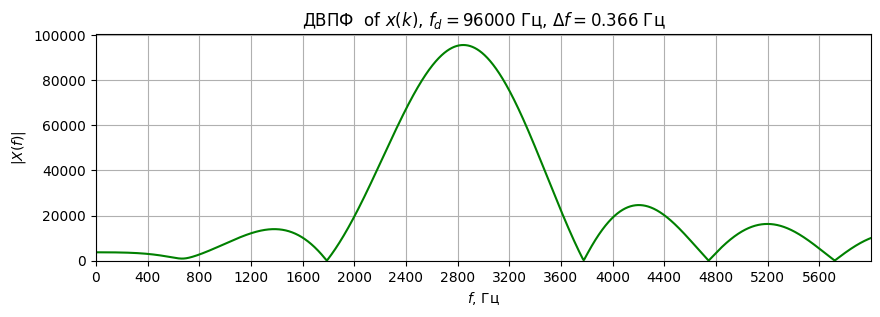

In [109]:
plt.figure(figsize=[10, 3], dpi=100)
M = 4096 * 8 * 8
plt.plot((-0.5 + (np.arange (M) / M)) * fs, 
         abs (np.fft.fftshift (np.fft.fft (x, M))) / M, 
         'g')

plt.axis(xmin = 0, xmax = 6000, ymin=0)
plt.xticks(np.arange(0, 6000, 400))


plt.title(u'ДВПФ  of $x(k)$, $f_d=%d$ Гц, $\Delta f=%.3f$ Гц' %(fs, fs/M))
plt.xlabel(u'$f$, Гц')
plt.ylabel(u'$|X(f)|$')
plt.grid()

In [118]:
M = 4096 * 8 * 8

f_array = (-0.5 + (np.arange (M) / M)) * fs
X_array = abs (np.fft.fftshift (np.fft.fft (x, M)))


k0 = 0
max = 0
for n in range (M):
  if max < X_array[n]:
    max = X_array[n]
    k0 = n

print (abs (f_array[k0]))

2844.3603515625


fs, x1 = scipy.io.wavfile.read('./tuning-fork.wav')